Loading the saved data for redshifts z = 0.1, 0.2, and 0.3 for different precession parameter values.

$\tilde{\theta} = 4$ or 8 and $\tilde{\Omega} = 2$ or 3

In [1]:
import pickle

# Load the data
with open('saved_data/mismatch_data_plus_SNRs/DICT_mismatch_S_prec_a4_f2_z01_high_res.pkl', 'rb') as f1:
    data_m_S_prec_a4_f2_z01_hr = pickle.load(f1)
    
with open('saved_data/mismatch_data_plus_SNRs/DICT_mismatch_S_prec_a4_f2_z02_high_res.pkl', 'rb') as f2:
    data_m_S_prec_a4_f2_z02_hr = pickle.load(f2)
    
with open('saved_data/mismatch_data_plus_SNRs/DICT_mismatch_S_prec_a4_f2_z03_high_res.pkl', 'rb') as f3:
    data_m_S_prec_a4_f2_z03_hr = pickle.load(f3)
    
with open('saved_data/mismatch_data_plus_SNRs/DICT_mismatch_J_prec_a4_f2_z01_high_res.pkl', 'rb') as f4:
    data_m_J_prec_a4_f2_z01_hr = pickle.load(f4)
    
with open('saved_data/mismatch_data_plus_SNRs/DICT_mismatch_J_prec_a4_f2_z02_high_res.pkl', 'rb') as f5:
    data_m_J_prec_a4_f2_z02_hr = pickle.load(f5)
    
with open('saved_data/mismatch_data_plus_SNRs/DICT_mismatch_J_prec_a4_f2_z03_high_res.pkl', 'rb') as f6:
    data_m_J_prec_a4_f2_z03_hr = pickle.load(f6)

In [2]:
with open('saved_data/mismatch_data_plus_SNRs/DICT_mismatch_S_prec_a4_f3_z01_high_res.pkl', 'rb') as f1:
    data_m_S_prec_a4_f3_z01_hr = pickle.load(f1)
    
with open('saved_data/mismatch_data_plus_SNRs/DICT_mismatch_S_prec_a4_f3_z02_high_res.pkl', 'rb') as f2:
    data_m_S_prec_a4_f3_z02_hr = pickle.load(f2)
    
with open('saved_data/mismatch_data_plus_SNRs/DICT_mismatch_S_prec_a4_f3_z03_high_res.pkl', 'rb') as f3:
    data_m_S_prec_a4_f3_z03_hr = pickle.load(f3)
    
with open('saved_data/mismatch_data_plus_SNRs/DICT_mismatch_J_prec_a4_f3_z01_high_res.pkl', 'rb') as f4:
    data_m_J_prec_a4_f3_z01_hr = pickle.load(f4)
    
with open('saved_data/mismatch_data_plus_SNRs/DICT_mismatch_J_prec_a4_f3_z02_high_res.pkl', 'rb') as f5:
    data_m_J_prec_a4_f3_z02_hr = pickle.load(f5)
    
with open('saved_data/mismatch_data_plus_SNRs/DICT_mismatch_J_prec_a4_f3_z03_high_res.pkl', 'rb') as f6:
    data_m_J_prec_a4_f3_z03_hr = pickle.load(f6)

In [3]:
with open('saved_data/mismatch_data_plus_SNRs/DICT_mismatch_S_prec_a8_f2_z01_high_res.pkl', 'rb') as f1:
    data_m_S_prec_a8_f2_z01_hr = pickle.load(f1)
    
with open('saved_data/mismatch_data_plus_SNRs/DICT_mismatch_S_prec_a8_f2_z02_high_res.pkl', 'rb') as f2:
    data_m_S_prec_a8_f2_z02_hr = pickle.load(f2)
    
with open('saved_data/mismatch_data_plus_SNRs/DICT_mismatch_S_prec_a8_f2_z03_high_res.pkl', 'rb') as f3:
    data_m_S_prec_a8_f2_z03_hr = pickle.load(f3)
    
with open('saved_data/mismatch_data_plus_SNRs/DICT_mismatch_J_prec_a8_f2_z01_high_res.pkl', 'rb') as f4:
    data_m_J_prec_a8_f2_z01_hr = pickle.load(f4)
    
with open('saved_data/mismatch_data_plus_SNRs/DICT_mismatch_J_prec_a8_f2_z02_high_res.pkl', 'rb') as f5:
    data_m_J_prec_a8_f2_z02_hr = pickle.load(f5)
    
with open('saved_data/mismatch_data_plus_SNRs/DICT_mismatch_J_prec_a8_f2_z03_high_res.pkl', 'rb') as f6:
    data_m_J_prec_a8_f2_z03_hr = pickle.load(f6)

In [4]:
with open('saved_data/mismatch_data_plus_SNRs/DICT_mismatch_S_prec_a8_f3_z01_high_res.pkl', 'rb') as f1:
    data_m_S_prec_a8_f3_z01_hr = pickle.load(f1)
    
with open('saved_data/mismatch_data_plus_SNRs/DICT_mismatch_S_prec_a8_f3_z02_high_res.pkl', 'rb') as f2:
    data_m_S_prec_a8_f3_z02_hr = pickle.load(f2)
    
with open('saved_data/mismatch_data_plus_SNRs/DICT_mismatch_S_prec_a8_f3_z03_high_res.pkl', 'rb') as f3:
    data_m_S_prec_a8_f3_z03_hr = pickle.load(f3)
    
with open('saved_data/mismatch_data_plus_SNRs/DICT_mismatch_J_prec_a8_f3_z01_high_res.pkl', 'rb') as f4:
    data_m_J_prec_a8_f3_z01_hr = pickle.load(f4)
    
with open('saved_data/mismatch_data_plus_SNRs/DICT_mismatch_J_prec_a8_f3_z02_high_res.pkl', 'rb') as f5:
    data_m_J_prec_a8_f3_z02_hr = pickle.load(f5)
    
with open('saved_data/mismatch_data_plus_SNRs/DICT_mismatch_J_prec_a8_f3_z03_high_res.pkl', 'rb') as f6:
    data_m_J_prec_a8_f3_z03_hr = pickle.load(f6)

Importing modules

In [5]:
import numpy as np
import matplotlib.pyplot as plt

Extracting data from the loaded dictionaries: Dictionaries include mismatches, SNRs, and params for which the mismatches and SNRs were calculated.


This is a tedious step made easy by github copilot (Phew!)

In [6]:
Mismatch_dict_S_arr_hr_42_01 = data_m_S_prec_a4_f2_z01_hr['Mismatch_dict_JnS_arr']
rp_dict_S_arr_hr_42_01 = data_m_S_prec_a4_f2_z01_hr['rp_param_JnS_arr']
SNR_dict_S_arr_hr_42_01 = data_m_S_prec_a4_f2_z01_hr['SNR_dict_JnS_arr']
rp_dict_S_arr_hr_42_01 = rp_dict_S_arr_hr_42_01.flatten()

Mismatch_dict_S_arr_hr_42_01_arr = np.array(Mismatch_dict_S_arr_hr_42_01).reshape(101, 101)
SNR_dict_S_arr_hr_42_01_arr = np.array(SNR_dict_S_arr_hr_42_01).reshape(101, 101)
rp_dict_S_arr_hr_42_01_arr = np.array(rp_dict_S_arr_hr_42_01).reshape(101, 101)


Mismatch_dict_S_arr_hr_42_02 = data_m_S_prec_a4_f2_z02_hr['Mismatch_dict_JnS_arr']
rp_dict_S_arr_hr_42_02 = data_m_S_prec_a4_f2_z02_hr['rp_param_JnS_arr']
SNR_dict_S_arr_hr_42_02 = data_m_S_prec_a4_f2_z02_hr['SNR_dict_JnS_arr']
rp_dict_S_arr_hr_42_02 = rp_dict_S_arr_hr_42_02.flatten()

Mismatch_dict_S_arr_hr_42_02_arr = np.array(Mismatch_dict_S_arr_hr_42_02).reshape(101, 101)
SNR_dict_S_arr_hr_42_02_arr = np.array(SNR_dict_S_arr_hr_42_02).reshape(101, 101)
rp_dict_S_arr_hr_42_02_arr = np.array(rp_dict_S_arr_hr_42_02).reshape(101, 101)


Mismatch_dict_S_arr_hr_42_03 = data_m_S_prec_a4_f2_z03_hr['Mismatch_dict_JnS_arr']
rp_dict_S_arr_hr_42_03 = data_m_S_prec_a4_f2_z03_hr['rp_param_JnS_arr']
SNR_dict_S_arr_hr_42_03 = data_m_S_prec_a4_f2_z03_hr['SNR_dict_JnS_arr']
rp_dict_S_arr_hr_42_03 = rp_dict_S_arr_hr_42_03.flatten()

Mismatch_dict_S_arr_hr_42_03_arr = np.array(Mismatch_dict_S_arr_hr_42_03).reshape(101, 101)
SNR_dict_S_arr_hr_42_03_arr = np.array(SNR_dict_S_arr_hr_42_03).reshape(101, 101)
rp_dict_S_arr_hr_42_03_arr = np.array(rp_dict_S_arr_hr_42_03).reshape(101, 101)




Mismatch_dict_S_arr_hr_83_01 = data_m_S_prec_a8_f3_z01_hr['Mismatch_dict_JnS_arr']
rp_dict_S_arr_hr_83_01 = data_m_S_prec_a8_f3_z01_hr['rp_param_JnS_arr']
SNR_dict_S_arr_hr_83_01 = data_m_S_prec_a8_f3_z01_hr['SNR_dict_JnS_arr']
rp_dict_S_arr_hr_83_01 = rp_dict_S_arr_hr_83_01.flatten()

Mismatch_dict_S_arr_hr_83_01_arr = np.array(Mismatch_dict_S_arr_hr_83_01).reshape(101, 101)
SNR_dict_S_arr_hr_83_01_arr = np.array(SNR_dict_S_arr_hr_83_01).reshape(101, 101)
rp_dict_S_arr_hr_83_01_arr = np.array(rp_dict_S_arr_hr_83_01).reshape(101, 101)


Mismatch_dict_S_arr_hr_83_02 = data_m_S_prec_a8_f3_z02_hr['Mismatch_dict_JnS_arr']
rp_dict_S_arr_hr_83_02 = data_m_S_prec_a8_f3_z02_hr['rp_param_JnS_arr']
SNR_dict_S_arr_hr_83_02 = data_m_S_prec_a8_f3_z02_hr['SNR_dict_JnS_arr']
rp_dict_S_arr_hr_83_02 = rp_dict_S_arr_hr_83_02.flatten()

Mismatch_dict_S_arr_hr_83_02_arr = np.array(Mismatch_dict_S_arr_hr_83_02).reshape(101, 101)
SNR_dict_S_arr_hr_83_02_arr = np.array(SNR_dict_S_arr_hr_83_02).reshape(101, 101)
rp_dict_S_arr_hr_83_02_arr = np.array(rp_dict_S_arr_hr_83_02).reshape(101, 101)


Mismatch_dict_S_arr_hr_83_03 = data_m_S_prec_a8_f3_z03_hr['Mismatch_dict_JnS_arr']
rp_dict_S_arr_hr_83_03 = data_m_S_prec_a8_f3_z03_hr['rp_param_JnS_arr']
SNR_dict_S_arr_hr_83_03 = data_m_S_prec_a8_f3_z03_hr['SNR_dict_JnS_arr']
rp_dict_S_arr_hr_83_03 = rp_dict_S_arr_hr_83_03.flatten()

Mismatch_dict_S_arr_hr_83_03_arr = np.array(Mismatch_dict_S_arr_hr_83_03).reshape(101, 101)
SNR_dict_S_arr_hr_83_03_arr = np.array(SNR_dict_S_arr_hr_83_03).reshape(101, 101)
rp_dict_S_arr_hr_83_03_arr = np.array(rp_dict_S_arr_hr_83_03).reshape(101, 101)

In [7]:
Mismatch_dict_J_arr_hr_42_01 = data_m_J_prec_a4_f2_z01_hr['Mismatch_dict_JnS_arr']
rp_dict_J_arr_hr_42_01 = data_m_J_prec_a4_f2_z01_hr['rp_param_JnS_arr']
SNR_dict_J_arr_hr_42_01 = data_m_J_prec_a4_f2_z01_hr['SNR_dict_JnS_arr']
rp_dict_J_arr_hr_42_01 = rp_dict_J_arr_hr_42_01.flatten()

Mismatch_dict_J_arr_hr_42_01_arr = np.array(Mismatch_dict_J_arr_hr_42_01).reshape(101, 101)
SNR_dict_J_arr_hr_42_01_arr = np.array(SNR_dict_J_arr_hr_42_01).reshape(101, 101)
rp_dict_J_arr_hr_42_01_arr = np.array(rp_dict_J_arr_hr_42_01).reshape(101, 101)


Mismatch_dict_J_arr_hr_42_02 = data_m_J_prec_a4_f2_z02_hr['Mismatch_dict_JnS_arr']
rp_dict_J_arr_hr_42_02 = data_m_J_prec_a4_f2_z02_hr['rp_param_JnS_arr']
SNR_dict_J_arr_hr_42_02 = data_m_J_prec_a4_f2_z02_hr['SNR_dict_JnS_arr']
rp_dict_J_arr_hr_42_02 = rp_dict_J_arr_hr_42_02.flatten()

Mismatch_dict_J_arr_hr_42_02_arr = np.array(Mismatch_dict_J_arr_hr_42_02).reshape(101, 101)
SNR_dict_J_arr_hr_42_02_arr = np.array(SNR_dict_J_arr_hr_42_02).reshape(101, 101)
rp_dict_J_arr_hr_42_02_arr = np.array(rp_dict_J_arr_hr_42_02).reshape(101, 101)


Mismatch_dict_J_arr_hr_42_03 = data_m_J_prec_a4_f2_z03_hr['Mismatch_dict_JnS_arr']
rp_dict_J_arr_hr_42_03 = data_m_J_prec_a4_f2_z03_hr['rp_param_JnS_arr']
SNR_dict_J_arr_hr_42_03 = data_m_J_prec_a4_f2_z03_hr['SNR_dict_JnS_arr']
rp_dict_J_arr_hr_42_03 = rp_dict_J_arr_hr_42_03.flatten()

Mismatch_dict_J_arr_hr_42_03_arr = np.array(Mismatch_dict_J_arr_hr_42_03).reshape(101, 101)
SNR_dict_J_arr_hr_42_03_arr = np.array(SNR_dict_J_arr_hr_42_03).reshape(101, 101)
rp_dict_J_arr_hr_42_03_arr = np.array(rp_dict_J_arr_hr_42_03).reshape(101, 101)



Mismatch_dict_J_arr_hr_83_01 = data_m_J_prec_a8_f3_z01_hr['Mismatch_dict_JnS_arr']
rp_dict_J_arr_hr_83_01 = data_m_J_prec_a8_f3_z01_hr['rp_param_JnS_arr']
SNR_dict_J_arr_hr_83_01 = data_m_J_prec_a8_f3_z01_hr['SNR_dict_JnS_arr']
rp_dict_J_arr_hr_83_01 = rp_dict_J_arr_hr_83_01.flatten()

Mismatch_dict_J_arr_hr_83_01_arr = np.array(Mismatch_dict_J_arr_hr_83_01).reshape(101, 101)
SNR_dict_J_arr_hr_83_01_arr = np.array(SNR_dict_J_arr_hr_83_01).reshape(101, 101)
rp_dict_J_arr_hr_83_01_arr = np.array(rp_dict_J_arr_hr_83_01).reshape(101, 101)


Mismatch_dict_J_arr_hr_83_02 = data_m_J_prec_a8_f3_z02_hr['Mismatch_dict_JnS_arr']
rp_dict_J_arr_hr_83_02 = data_m_J_prec_a8_f3_z02_hr['rp_param_JnS_arr']
SNR_dict_J_arr_hr_83_02 = data_m_J_prec_a8_f3_z02_hr['SNR_dict_JnS_arr']
rp_dict_J_arr_hr_83_02 = rp_dict_J_arr_hr_83_02.flatten()

Mismatch_dict_J_arr_hr_83_02_arr = np.array(Mismatch_dict_J_arr_hr_83_02).reshape(101, 101)
SNR_dict_J_arr_hr_83_02_arr = np.array(SNR_dict_J_arr_hr_83_02).reshape(101, 101)
rp_dict_J_arr_hr_83_02_arr = np.array(rp_dict_J_arr_hr_83_02).reshape(101, 101)


Mismatch_dict_J_arr_hr_83_03 = data_m_J_prec_a8_f3_z03_hr['Mismatch_dict_JnS_arr']
rp_dict_J_arr_hr_83_03 = data_m_J_prec_a8_f3_z03_hr['rp_param_JnS_arr']
SNR_dict_J_arr_hr_83_03 = data_m_J_prec_a8_f3_z03_hr['SNR_dict_JnS_arr']
rp_dict_J_arr_hr_83_03 = rp_dict_J_arr_hr_83_03.flatten()

Mismatch_dict_J_arr_hr_83_03_arr = np.array(Mismatch_dict_J_arr_hr_83_03).reshape(101, 101)
SNR_dict_J_arr_hr_83_03_arr = np.array(SNR_dict_J_arr_hr_83_03).reshape(101, 101)
rp_dict_J_arr_hr_83_03_arr = np.array(rp_dict_J_arr_hr_83_03).reshape(101, 101)

In [8]:
Mismatch_dict_S_arr_hr_43_01 = data_m_S_prec_a4_f3_z01_hr['Mismatch_dict_JnS_arr']
rp_dict_S_arr_hr_43_01 = data_m_S_prec_a4_f3_z01_hr['rp_param_JnS_arr']
SNR_dict_S_arr_hr_43_01 = data_m_S_prec_a4_f3_z01_hr['SNR_dict_JnS_arr']
rp_dict_S_arr_hr_43_01 = rp_dict_S_arr_hr_43_01.flatten()

Mismatch_dict_S_arr_hr_43_01_arr = np.array(Mismatch_dict_S_arr_hr_43_01).reshape(101, 101)
SNR_dict_S_arr_hr_43_01_arr = np.array(SNR_dict_S_arr_hr_43_01).reshape(101, 101)
rp_dict_S_arr_hr_43_01_arr = np.array(rp_dict_S_arr_hr_43_01).reshape(101, 101)


Mismatch_dict_S_arr_hr_43_02 = data_m_S_prec_a4_f3_z02_hr['Mismatch_dict_JnS_arr']
rp_dict_S_arr_hr_43_02 = data_m_S_prec_a4_f3_z02_hr['rp_param_JnS_arr']
SNR_dict_S_arr_hr_43_02 = data_m_S_prec_a4_f3_z02_hr['SNR_dict_JnS_arr']
rp_dict_S_arr_hr_43_02 = rp_dict_S_arr_hr_43_02.flatten()

Mismatch_dict_S_arr_hr_43_02_arr = np.array(Mismatch_dict_S_arr_hr_43_02).reshape(101, 101)
SNR_dict_S_arr_hr_43_02_arr = np.array(SNR_dict_S_arr_hr_43_02).reshape(101, 101)
rp_dict_S_arr_hr_43_02_arr = np.array(rp_dict_S_arr_hr_43_02).reshape(101, 101)


Mismatch_dict_S_arr_hr_43_03 = data_m_S_prec_a4_f3_z03_hr['Mismatch_dict_JnS_arr']
rp_dict_S_arr_hr_43_03 = data_m_S_prec_a4_f3_z03_hr['rp_param_JnS_arr']
SNR_dict_S_arr_hr_43_03 = data_m_S_prec_a4_f3_z03_hr['SNR_dict_JnS_arr']
rp_dict_S_arr_hr_43_03 = rp_dict_S_arr_hr_43_03.flatten()

Mismatch_dict_S_arr_hr_43_03_arr = np.array(Mismatch_dict_S_arr_hr_43_03).reshape(101, 101)
SNR_dict_S_arr_hr_43_03_arr = np.array(SNR_dict_S_arr_hr_43_03).reshape(101, 101)
rp_dict_S_arr_hr_43_03_arr = np.array(rp_dict_S_arr_hr_43_03).reshape(101, 101)



Mismatch_dict_J_arr_hr_43_01 = data_m_J_prec_a4_f3_z01_hr['Mismatch_dict_JnS_arr']
rp_dict_J_arr_hr_43_01 = data_m_J_prec_a4_f3_z01_hr['rp_param_JnS_arr']
SNR_dict_J_arr_hr_43_01 = data_m_J_prec_a4_f3_z01_hr['SNR_dict_JnS_arr']
rp_dict_J_arr_hr_43_01 = rp_dict_J_arr_hr_43_01.flatten()

Mismatch_dict_J_arr_hr_43_01_arr = np.array(Mismatch_dict_J_arr_hr_43_01).reshape(101, 101)
SNR_dict_J_arr_hr_43_01_arr = np.array(SNR_dict_J_arr_hr_43_01).reshape(101, 101)
rp_dict_J_arr_hr_43_01_arr = np.array(rp_dict_J_arr_hr_43_01).reshape(101, 101)


Mismatch_dict_J_arr_hr_43_02 = data_m_J_prec_a4_f3_z02_hr['Mismatch_dict_JnS_arr']
rp_dict_J_arr_hr_43_02 = data_m_J_prec_a4_f3_z02_hr['rp_param_JnS_arr']
SNR_dict_J_arr_hr_43_02 = data_m_J_prec_a4_f3_z02_hr['SNR_dict_JnS_arr']
rp_dict_J_arr_hr_43_02 = rp_dict_J_arr_hr_43_02.flatten()

Mismatch_dict_J_arr_hr_43_02_arr = np.array(Mismatch_dict_J_arr_hr_43_02).reshape(101, 101)
SNR_dict_J_arr_hr_43_02_arr = np.array(SNR_dict_J_arr_hr_43_02).reshape(101, 101)
rp_dict_J_arr_hr_43_02_arr = np.array(rp_dict_J_arr_hr_43_02).reshape(101, 101)


Mismatch_dict_J_arr_hr_43_03 = data_m_J_prec_a4_f3_z03_hr['Mismatch_dict_JnS_arr']
rp_dict_J_arr_hr_43_03 = data_m_J_prec_a4_f3_z03_hr['rp_param_JnS_arr']
SNR_dict_J_arr_hr_43_03 = data_m_J_prec_a4_f3_z03_hr['SNR_dict_JnS_arr']
rp_dict_J_arr_hr_43_03 = rp_dict_J_arr_hr_43_03.flatten()

Mismatch_dict_J_arr_hr_43_03_arr = np.array(Mismatch_dict_J_arr_hr_43_03).reshape(101, 101)
SNR_dict_J_arr_hr_43_03_arr = np.array(SNR_dict_J_arr_hr_43_03).reshape(101, 101)
rp_dict_J_arr_hr_43_03_arr = np.array(rp_dict_J_arr_hr_43_03).reshape(101, 101)



Mismatch_dict_S_arr_hr_82_01 = data_m_S_prec_a8_f2_z01_hr['Mismatch_dict_JnS_arr']
rp_dict_S_arr_hr_82_01 = data_m_S_prec_a8_f2_z01_hr['rp_param_JnS_arr']
SNR_dict_S_arr_hr_82_01 = data_m_S_prec_a8_f2_z01_hr['SNR_dict_JnS_arr']
rp_dict_S_arr_hr_82_01 = rp_dict_S_arr_hr_82_01.flatten()

Mismatch_dict_S_arr_hr_82_01_arr = np.array(Mismatch_dict_S_arr_hr_82_01).reshape(101, 101)
SNR_dict_S_arr_hr_82_01_arr = np.array(SNR_dict_S_arr_hr_82_01).reshape(101, 101)
rp_dict_S_arr_hr_82_01_arr = np.array(rp_dict_S_arr_hr_82_01).reshape(101, 101)


Mismatch_dict_S_arr_hr_82_02 = data_m_S_prec_a8_f2_z02_hr['Mismatch_dict_JnS_arr']
rp_dict_S_arr_hr_82_02 = data_m_S_prec_a8_f2_z02_hr['rp_param_JnS_arr']
SNR_dict_S_arr_hr_82_02 = data_m_S_prec_a8_f2_z02_hr['SNR_dict_JnS_arr']
rp_dict_S_arr_hr_82_02 = rp_dict_S_arr_hr_82_02.flatten()

Mismatch_dict_S_arr_hr_82_02_arr = np.array(Mismatch_dict_S_arr_hr_82_02).reshape(101, 101)
SNR_dict_S_arr_hr_82_02_arr = np.array(SNR_dict_S_arr_hr_82_02).reshape(101, 101)
rp_dict_S_arr_hr_82_02_arr = np.array(rp_dict_S_arr_hr_82_02).reshape(101, 101)


Mismatch_dict_S_arr_hr_82_03 = data_m_S_prec_a8_f2_z03_hr['Mismatch_dict_JnS_arr']
rp_dict_S_arr_hr_82_03 = data_m_S_prec_a8_f2_z03_hr['rp_param_JnS_arr']
SNR_dict_S_arr_hr_82_03 = data_m_S_prec_a8_f2_z03_hr['SNR_dict_JnS_arr']
rp_dict_S_arr_hr_82_03 = rp_dict_S_arr_hr_82_03.flatten()

Mismatch_dict_S_arr_hr_82_03_arr = np.array(Mismatch_dict_S_arr_hr_82_03).reshape(101, 101)
SNR_dict_S_arr_hr_82_03_arr = np.array(SNR_dict_S_arr_hr_82_03).reshape(101, 101)
rp_dict_S_arr_hr_82_03_arr = np.array(rp_dict_S_arr_hr_82_03).reshape(101, 101)



Mismatch_dict_J_arr_hr_82_01 = data_m_J_prec_a8_f2_z01_hr['Mismatch_dict_JnS_arr']
rp_dict_J_arr_hr_82_01 = data_m_J_prec_a8_f2_z01_hr['rp_param_JnS_arr']
SNR_dict_J_arr_hr_82_01 = data_m_J_prec_a8_f2_z01_hr['SNR_dict_JnS_arr']
rp_dict_J_arr_hr_82_01 = rp_dict_J_arr_hr_82_01.flatten()

Mismatch_dict_J_arr_hr_82_01_arr = np.array(Mismatch_dict_J_arr_hr_82_01).reshape(101, 101)
SNR_dict_J_arr_hr_82_01_arr = np.array(SNR_dict_J_arr_hr_82_01).reshape(101, 101)
rp_dict_J_arr_hr_82_01_arr = np.array(rp_dict_J_arr_hr_82_01).reshape(101, 101)


Mismatch_dict_J_arr_hr_82_02 = data_m_J_prec_a8_f2_z02_hr['Mismatch_dict_JnS_arr']
rp_dict_J_arr_hr_82_02 = data_m_J_prec_a8_f2_z02_hr['rp_param_JnS_arr']
SNR_dict_J_arr_hr_82_02 = data_m_J_prec_a8_f2_z02_hr['SNR_dict_JnS_arr']
rp_dict_J_arr_hr_82_02 = rp_dict_J_arr_hr_82_02.flatten()

Mismatch_dict_J_arr_hr_82_02_arr = np.array(Mismatch_dict_J_arr_hr_82_02).reshape(101, 101)
SNR_dict_J_arr_hr_82_02_arr = np.array(SNR_dict_J_arr_hr_82_02).reshape(101, 101)
rp_dict_J_arr_hr_82_02_arr = np.array(rp_dict_J_arr_hr_82_02).reshape(101, 101)


Mismatch_dict_J_arr_hr_82_03 = data_m_J_prec_a8_f2_z03_hr['Mismatch_dict_JnS_arr']
rp_dict_J_arr_hr_82_03 = data_m_J_prec_a8_f2_z03_hr['rp_param_JnS_arr']
SNR_dict_J_arr_hr_82_03 = data_m_J_prec_a8_f2_z03_hr['SNR_dict_JnS_arr']
rp_dict_J_arr_hr_82_03 = rp_dict_J_arr_hr_82_03.flatten()

Mismatch_dict_J_arr_hr_82_03_arr = np.array(Mismatch_dict_J_arr_hr_82_03).reshape(101, 101)
SNR_dict_J_arr_hr_82_03_arr = np.array(SNR_dict_J_arr_hr_82_03).reshape(101, 101)
rp_dict_J_arr_hr_82_03_arr = np.array(rp_dict_J_arr_hr_82_03).reshape(101, 101)

Now, with the mismatches and SNRs we can use Lindblom criterion

$\epsilon \geq \frac{1}{2\rho^2}$

where $\epsilon$ is the mismatch and $\rho$ is the SNR.

In [9]:
Mismatch_2d_S_42_01 = np.empty(Mismatch_dict_S_arr_hr_42_01_arr.shape)

lindblom_RPNP_S_42_01 = np.empty(Mismatch_dict_S_arr_hr_42_01_arr.shape)
lindblom_RPRP_S_42_01 = np.empty(Mismatch_dict_S_arr_hr_42_01_arr.shape)
lindblom_NPNP_S_42_01 = np.empty(Mismatch_dict_S_arr_hr_42_01_arr.shape)

counters_1 = 0
counters_2 = 0
counters_3 = 0

for i in range(101):
    for j in range(101):
        
        if i > 50:
                Mismatch_2d_S_42_01[i, j] = Mismatch_dict_S_arr_hr_42_01_arr[100 - i, j]['min_mismatch']
                lindblom_RPNP_S_42_01[i, j] = ((1/2) * (SNR_dict_S_arr_hr_42_01_arr[100 - i, j]['SNR_RPNP']**(-2)))
                lindblom_RPRP_S_42_01[i, j] = ((1/2) * (SNR_dict_S_arr_hr_42_01_arr[100 - i, j]['SNR_RPRP']**(-2)))
                lindblom_NPNP_S_42_01[i, j] = ((1/2) * (SNR_dict_S_arr_hr_42_01_arr[100 - i, j]['SNR_NPNP']**(-2)))
                if SNR_dict_S_arr_hr_42_01_arr[100 - i, j]['SNR_NPNP'] < 1:
                    lindblom_NPNP_S_42_01[i, j] = 1
                    counters_1 += 1
                if SNR_dict_S_arr_hr_42_01_arr[100 - i, j]['SNR_RPNP'] < 1:
                    lindblom_RPNP_S_42_01[i, j] = 1
                    counters_2 += 1
                if SNR_dict_S_arr_hr_42_01_arr[100 - i, j]['SNR_RPRP'] < 1:
                    lindblom_RPRP_S_42_01[i, j] = 1
                    counters_3 += 1
                    
             
        else:
            Mismatch_2d_S_42_01[i, j] = Mismatch_dict_S_arr_hr_42_01_arr[i, j]['min_mismatch']
            lindblom_RPNP_S_42_01[i, j] = ((1/2) * (SNR_dict_S_arr_hr_42_01_arr[i, j]['SNR_RPNP']**(-2)))
            lindblom_RPRP_S_42_01[i, j] = ((1/2) * (SNR_dict_S_arr_hr_42_01_arr[i, j]['SNR_RPRP']**(-2)))
            lindblom_NPNP_S_42_01[i, j] = ((1/2) * (SNR_dict_S_arr_hr_42_01_arr[i, j]['SNR_NPNP']**(-2)))
            if SNR_dict_S_arr_hr_42_01_arr[i, j]['SNR_NPNP'] < 1:
                lindblom_NPNP_S_42_01[i, j] = 1
                counters_1 += 1
            if SNR_dict_S_arr_hr_42_01_arr[i, j]['SNR_RPNP'] < 1:
                lindblom_RPNP_S_42_01[i, j] = 1
                counters_2 += 1
            if SNR_dict_S_arr_hr_42_01_arr[i, j]['SNR_RPRP'] < 1:
                lindblom_RPRP_S_42_01[i, j] = 1
                counters_3 += 1
            
print(counters_1, counters_2, counters_3)
        

86 246 24


In [10]:
Mismatch_2d_J_42_01 = np.empty(Mismatch_dict_J_arr_hr_42_01_arr.shape)

lindblom_RPNP_J_42_01 = np.empty(Mismatch_dict_J_arr_hr_42_01_arr.shape)
lindblom_RPRP_J_42_01 = np.empty(Mismatch_dict_J_arr_hr_42_01_arr.shape)
lindblom_NPNP_J_42_01 = np.empty(Mismatch_dict_J_arr_hr_42_01_arr.shape)

counters_1 = 0
counters_2 = 0
counters_3 = 0

for i in range(101):
    for j in range(101):
        if i > 50:
            Mismatch_2d_J_42_01[i, j] = Mismatch_dict_J_arr_hr_42_01_arr[100 - i, j]['min_mismatch']
            lindblom_RPNP_J_42_01[i, j] = ((1/2) * (SNR_dict_J_arr_hr_42_01_arr[100 - i, j]['SNR_RPNP']**(-2)))
            lindblom_RPRP_J_42_01[i, j] = ((1/2) * (SNR_dict_J_arr_hr_42_01_arr[100 - i, j]['SNR_RPRP']**(-2)))
            lindblom_NPNP_J_42_01[i, j] = ((1/2) * (SNR_dict_J_arr_hr_42_01_arr[100 - i, j]['SNR_NPNP']**(-2)))
            if SNR_dict_J_arr_hr_42_01_arr[100 - i, j]['SNR_NPNP'] < 1:
                lindblom_NPNP_J_42_01[i, j] = 1
                counters_1 += 1
            if SNR_dict_J_arr_hr_42_01_arr[100 - i, j]['SNR_RPNP'] < 1:
                lindblom_RPNP_J_42_01[i, j] = 1
                counters_2 += 1
            if SNR_dict_J_arr_hr_42_01_arr[100 - i, j]['SNR_RPRP'] < 1:
                lindblom_RPRP_J_42_01[i, j] = 1
                counters_3 += 1
        
        else:
            Mismatch_2d_J_42_01[i, j] = Mismatch_dict_J_arr_hr_42_01_arr[i, j]['min_mismatch']
            lindblom_RPNP_J_42_01[i, j] = ((1/2) * (SNR_dict_J_arr_hr_42_01_arr[i, j]['SNR_RPNP']**(-2)))
            lindblom_RPRP_J_42_01[i, j] = ((1/2) * (SNR_dict_J_arr_hr_42_01_arr[i, j]['SNR_RPRP']**(-2)))
            lindblom_NPNP_J_42_01[i, j] = ((1/2) * (SNR_dict_J_arr_hr_42_01_arr[i, j]['SNR_NPNP']**(-2)))
            if SNR_dict_J_arr_hr_42_01_arr[i, j]['SNR_NPNP'] < 1:
                lindblom_NPNP_J_42_01[i, j] = 1
                counters_1 += 1
            if SNR_dict_J_arr_hr_42_01_arr[i, j]['SNR_RPNP'] < 1:
                lindblom_RPNP_J_42_01[i, j] = 1
                counters_2 += 1
            if SNR_dict_J_arr_hr_42_01_arr[i, j]['SNR_RPRP'] < 1:
                lindblom_RPRP_J_42_01[i, j] = 1
                counters_3 += 1
                
            
print(counters_1, counters_2, counters_3)
        

12 54 0


In [11]:
Mismatch_2d_S_42_02 = np.empty(Mismatch_dict_S_arr_hr_42_02_arr.shape)

lindblom_RPNP_S_42_02 = np.empty(Mismatch_dict_S_arr_hr_42_02_arr.shape)
lindblom_RPRP_S_42_02 = np.empty(Mismatch_dict_S_arr_hr_42_02_arr.shape)
lindblom_NPNP_S_42_02 = np.empty(Mismatch_dict_S_arr_hr_42_02_arr.shape)

counters_1 = 0
counters_2 = 0
counters_3 = 0

for i in range(101):
    for j in range(101):
        if i > 50:
            Mismatch_2d_S_42_02[i, j] = Mismatch_dict_S_arr_hr_42_02_arr[100 - i, j]['min_mismatch']
            lindblom_RPNP_S_42_02[i, j] = ((1/2) * (SNR_dict_S_arr_hr_42_02_arr[100 - i, j]['SNR_RPNP']**(-2)))
            lindblom_RPRP_S_42_02[i, j] = ((1/2) * (SNR_dict_S_arr_hr_42_02_arr[100 - i, j]['SNR_RPRP']**(-2)))
            lindblom_NPNP_S_42_02[i, j] = ((1/2) * (SNR_dict_S_arr_hr_42_02_arr[100 - i, j]['SNR_NPNP']**(-2)))
            if SNR_dict_S_arr_hr_42_02_arr[100 - i, j]['SNR_NPNP'] < 1:
                lindblom_NPNP_S_42_02[i, j] = 1
                counters_1 += 1
            if SNR_dict_S_arr_hr_42_02_arr[100 - i, j]['SNR_RPNP'] < 1:
                lindblom_RPNP_S_42_02[i, j] = 1
                counters_2 += 1
            if SNR_dict_S_arr_hr_42_02_arr[100 - i, j]['SNR_RPRP'] < 1:
                lindblom_RPRP_S_42_02[i, j] = 1
                counters_3 += 1
        else:
            Mismatch_2d_S_42_02[i, j] = Mismatch_dict_S_arr_hr_42_02_arr[i, j]['min_mismatch']
            lindblom_RPNP_S_42_02[i, j] = ((1/2) * (SNR_dict_S_arr_hr_42_02_arr[i, j]['SNR_RPNP']**(-2)))
            lindblom_RPRP_S_42_02[i, j] = ((1/2) * (SNR_dict_S_arr_hr_42_02_arr[i, j]['SNR_RPRP']**(-2)))
            lindblom_NPNP_S_42_02[i, j] = ((1/2) * (SNR_dict_S_arr_hr_42_02_arr[i, j]['SNR_NPNP']**(-2)))
            if SNR_dict_S_arr_hr_42_02_arr[i, j]['SNR_NPNP'] < 1:
                lindblom_NPNP_S_42_02[i, j] = 1
                counters_1 += 1
            if SNR_dict_S_arr_hr_42_02_arr[i, j]['SNR_RPNP'] < 1:
                lindblom_RPNP_S_42_02[i, j] = 1
                counters_2 += 1
            if SNR_dict_S_arr_hr_42_02_arr[i, j]['SNR_RPRP'] < 1:
                lindblom_RPRP_S_42_02[i, j] = 1
                counters_3 += 1
                
            
print(counters_1, counters_2, counters_3)
        

266 752 68


In [12]:
Mismatch_2d_J_42_02 = np.empty(Mismatch_dict_J_arr_hr_42_02_arr.shape)

lindblom_RPNP_J_42_02 = np.empty(Mismatch_dict_J_arr_hr_42_02_arr.shape)
lindblom_RPRP_J_42_02 = np.empty(Mismatch_dict_J_arr_hr_42_02_arr.shape)
lindblom_NPNP_J_42_02 = np.empty(Mismatch_dict_J_arr_hr_42_02_arr.shape)

counters_1 = 0
counters_2 = 0
counters_3 = 0

for i in range(101):
    for j in range(101):
        if i > 50:
            Mismatch_2d_J_42_02[i, j] = Mismatch_dict_J_arr_hr_42_02_arr[100 - i, j]['min_mismatch']
            lindblom_RPNP_J_42_02[i, j] = ((1/2) * (SNR_dict_J_arr_hr_42_02_arr[100 - i, j]['SNR_RPNP']**(-2)))
            lindblom_RPRP_J_42_02[i, j] = ((1/2) * (SNR_dict_J_arr_hr_42_02_arr[100 - i, j]['SNR_RPRP']**(-2)))
            lindblom_NPNP_J_42_02[i, j] = ((1/2) * (SNR_dict_J_arr_hr_42_02_arr[100 - i, j]['SNR_NPNP']**(-2)))
            if SNR_dict_J_arr_hr_42_02_arr[100 - i, j]['SNR_NPNP'] < 1:
                lindblom_NPNP_J_42_02[i, j] = 1
                counters_1 += 1
            if SNR_dict_J_arr_hr_42_02_arr[100 - i, j]['SNR_RPNP'] < 1:
                lindblom_RPNP_J_42_02[i, j] = 1
                counters_2 += 1
            if SNR_dict_J_arr_hr_42_02_arr[100 - i, j]['SNR_RPRP'] < 1:
                lindblom_RPRP_J_42_02[i, j] = 1
                counters_3 += 1
            
        else:
            Mismatch_2d_J_42_02[i, j] = Mismatch_dict_J_arr_hr_42_02_arr[i, j]['min_mismatch']
            lindblom_RPNP_J_42_02[i, j] = ((1/2) * (SNR_dict_J_arr_hr_42_02_arr[i, j]['SNR_RPNP']**(-2)))
            lindblom_RPRP_J_42_02[i, j] = ((1/2) * (SNR_dict_J_arr_hr_42_02_arr[i, j]['SNR_RPRP']**(-2)))
            lindblom_NPNP_J_42_02[i, j] = ((1/2) * (SNR_dict_J_arr_hr_42_02_arr[i, j]['SNR_NPNP']**(-2)))
            if SNR_dict_J_arr_hr_42_02_arr[i, j]['SNR_NPNP'] < 1:
                lindblom_NPNP_J_42_02[i, j] = 1
                counters_1 += 1
            if SNR_dict_J_arr_hr_42_02_arr[i, j]['SNR_RPNP'] < 1:
                lindblom_RPNP_J_42_02[i, j] = 1
                counters_2 += 1
            if SNR_dict_J_arr_hr_42_02_arr[i, j]['SNR_RPRP'] < 1:
                lindblom_RPRP_J_42_02[i, j] = 1
                counters_3 += 1
            
            
print(counters_1, counters_2, counters_3)
        

32 172 0


In [13]:
Mismatch_2d_S_42_03 = np.empty(Mismatch_dict_S_arr_hr_42_03_arr.shape)

lindblom_RPNP_S_42_03 = np.empty(Mismatch_dict_S_arr_hr_42_03_arr.shape)
lindblom_RPRP_S_42_03 = np.empty(Mismatch_dict_S_arr_hr_42_03_arr.shape)
lindblom_NPNP_S_42_03 = np.empty(Mismatch_dict_S_arr_hr_42_03_arr.shape)

counters_1 = 0
counters_2 = 0
counters_3 = 0

for i in range(101):
    for j in range(101):
        if i < 50:
            Mismatch_2d_S_42_03[i, j] = Mismatch_dict_S_arr_hr_42_03_arr[100 - i, j]['min_mismatch']
            lindblom_RPNP_S_42_03[i, j] = ((1/2) * (SNR_dict_S_arr_hr_42_03_arr[100 - i, j]['SNR_RPNP']**(-2)))
            lindblom_RPRP_S_42_03[i, j] = ((1/2) * (SNR_dict_S_arr_hr_42_03_arr[100 - i, j]['SNR_RPRP']**(-2)))
            lindblom_NPNP_S_42_03[i, j] = ((1/2) * (SNR_dict_S_arr_hr_42_03_arr[100 - i, j]['SNR_NPNP']**(-2)))
            if SNR_dict_S_arr_hr_42_03_arr[100 - i, j]['SNR_NPNP'] < 1:
                lindblom_NPNP_S_42_03[i, j] = 1
                counters_1 += 1
            if SNR_dict_S_arr_hr_42_03_arr[100 - i, j]['SNR_RPNP'] < 1:
                lindblom_RPNP_S_42_03[i, j] = 1
                counters_2 += 1
            if SNR_dict_S_arr_hr_42_03_arr[100 - i, j]['SNR_RPRP'] < 1:
                lindblom_RPRP_S_42_03[i, j] = 1
                counters_3 += 1
        
        else:
            Mismatch_2d_S_42_03[i, j] = Mismatch_dict_S_arr_hr_42_03_arr[i, j]['min_mismatch']
            lindblom_RPNP_S_42_03[i, j] = ((1/2) * (SNR_dict_S_arr_hr_42_03_arr[i, j]['SNR_RPNP']**(-2)))
            lindblom_RPRP_S_42_03[i, j] = ((1/2) * (SNR_dict_S_arr_hr_42_03_arr[i, j]['SNR_RPRP']**(-2)))
            lindblom_NPNP_S_42_03[i, j] = ((1/2) * (SNR_dict_S_arr_hr_42_03_arr[i, j]['SNR_NPNP']**(-2)))
            if SNR_dict_S_arr_hr_42_03_arr[i, j]['SNR_NPNP'] < 1:
                lindblom_NPNP_S_42_03[i, j] = 1
                counters_1 += 1
            if SNR_dict_S_arr_hr_42_03_arr[i, j]['SNR_RPNP'] < 1:
                lindblom_RPNP_S_42_03[i, j] = 1
                counters_2 += 1
            if SNR_dict_S_arr_hr_42_03_arr[i, j]['SNR_RPRP'] < 1:
                lindblom_RPRP_S_42_03[i, j] = 1
                counters_3 += 1
            
            
print(counters_1, counters_2, counters_3)
        

586 1010 162


In [14]:
Mismatch_2d_J_42_03 = np.empty(Mismatch_dict_J_arr_hr_42_03_arr.shape)

lindblom_RPNP_J_42_03 = np.empty(Mismatch_dict_J_arr_hr_42_03_arr.shape)
lindblom_RPRP_J_42_03 = np.empty(Mismatch_dict_J_arr_hr_42_03_arr.shape)
lindblom_NPNP_J_42_03 = np.empty(Mismatch_dict_J_arr_hr_42_03_arr.shape)

counters_1 = 0
counters_2 = 0
counters_3 = 0

for i in range(101):
    for j in range(101):
        if i > 50:
            Mismatch_2d_J_42_03[i, j] = Mismatch_dict_J_arr_hr_42_03_arr[100 - i, j]['min_mismatch']
            lindblom_RPNP_J_42_03[i, j] = ((1/2) * (SNR_dict_J_arr_hr_42_03_arr[100 - i, j]['SNR_RPNP']**(-2)))
            lindblom_RPRP_J_42_03[i, j] = ((1/2) * (SNR_dict_J_arr_hr_42_03_arr[100 - i, j]['SNR_RPRP']**(-2)))
            lindblom_NPNP_J_42_03[i, j] = ((1/2) * (SNR_dict_J_arr_hr_42_03_arr[100 - i, j]['SNR_NPNP']**(-2)))
            if SNR_dict_J_arr_hr_42_03_arr[100 - i, j]['SNR_NPNP'] < 1:
                lindblom_NPNP_J_42_03[i, j] = 1
                counters_1 += 1
            if SNR_dict_J_arr_hr_42_03_arr[100 - i, j]['SNR_RPNP'] < 1:
                lindblom_RPNP_J_42_03[i, j] = 1
                counters_2 += 1
            if SNR_dict_J_arr_hr_42_03_arr[100 - i, j]['SNR_RPRP'] < 1:
                lindblom_RPRP_J_42_03[i, j] = 1
                counters_3 += 1
            
        else:
            Mismatch_2d_J_42_03[i, j] = Mismatch_dict_J_arr_hr_42_03_arr[i, j]['min_mismatch']
            lindblom_RPNP_J_42_03[i, j] = ((1/2) * (SNR_dict_J_arr_hr_42_03_arr[i, j]['SNR_RPNP']**(-2)))
            lindblom_RPRP_J_42_03[i, j] = ((1/2) * (SNR_dict_J_arr_hr_42_03_arr[i, j]['SNR_RPRP']**(-2)))
            lindblom_NPNP_J_42_03[i, j] = ((1/2) * (SNR_dict_J_arr_hr_42_03_arr[i, j]['SNR_NPNP']**(-2)))
            if SNR_dict_J_arr_hr_42_03_arr[i, j]['SNR_NPNP'] < 1:
                lindblom_NPNP_J_42_03[i, j] = 1
                counters_1 += 1
            if SNR_dict_J_arr_hr_42_03_arr[i, j]['SNR_RPNP'] < 1:
                lindblom_RPNP_J_42_03[i, j] = 1
                counters_2 += 1
            if SNR_dict_J_arr_hr_42_03_arr[i, j]['SNR_RPRP'] < 1:
                lindblom_RPRP_J_42_03[i, j] = 1
                counters_3 += 1
            
            
print(counters_1, counters_2, counters_3)
        

80 290 0


In [15]:
Mismatch_2d_S_43_01 = np.empty(Mismatch_dict_S_arr_hr_43_01_arr.shape)

lindblom_RPNP_S_43_01 = np.empty(Mismatch_dict_S_arr_hr_43_01_arr.shape)
lindblom_RPRP_S_43_01 = np.empty(Mismatch_dict_S_arr_hr_43_01_arr.shape)
lindblom_NPNP_S_43_01 = np.empty(Mismatch_dict_S_arr_hr_43_01_arr.shape)

counters_1 = 0
counters_2 = 0
counters_3 = 0

for i in range(101):
    for j in range(101):
        if i > 50:
            Mismatch_2d_S_43_01[i, j] = Mismatch_dict_S_arr_hr_43_01_arr[100 - i, j]['min_mismatch']
            lindblom_RPNP_S_43_01[i, j] = ((1/2) * (SNR_dict_S_arr_hr_43_01_arr[100 - i, j]['SNR_RPNP']**(-2)))
            lindblom_RPRP_S_43_01[i, j] = ((1/2) * (SNR_dict_S_arr_hr_43_01_arr[100 - i, j]['SNR_RPRP']**(-2)))
            lindblom_NPNP_S_43_01[i, j] = ((1/2) * (SNR_dict_S_arr_hr_43_01_arr[100 - i, j]['SNR_NPNP']**(-2)))
            if SNR_dict_S_arr_hr_43_01_arr[100 - i, j]['SNR_NPNP'] < 1:
                lindblom_NPNP_S_43_01[i, j] = 1
                counters_1 += 1
            if SNR_dict_S_arr_hr_43_01_arr[100 - i, j]['SNR_RPNP'] < 1:
                lindblom_RPNP_S_43_01[i, j] = 1
                counters_2 += 1
            if SNR_dict_S_arr_hr_43_01_arr[100 - i, j]['SNR_RPRP'] < 1:
                lindblom_RPRP_S_43_01[i, j] = 1
                counters_3 += 1
        else:    
            Mismatch_2d_S_43_01[i, j] = Mismatch_dict_S_arr_hr_43_01_arr[i, j]['min_mismatch']
            lindblom_RPNP_S_43_01[i, j] = ((1/2) * (SNR_dict_S_arr_hr_43_01_arr[i, j]['SNR_RPNP']**(-2)))
            lindblom_RPRP_S_43_01[i, j] = ((1/2) * (SNR_dict_S_arr_hr_43_01_arr[i, j]['SNR_RPRP']**(-2)))
            lindblom_NPNP_S_43_01[i, j] = ((1/2) * (SNR_dict_S_arr_hr_43_01_arr[i, j]['SNR_NPNP']**(-2)))
            if SNR_dict_S_arr_hr_43_01_arr[i, j]['SNR_NPNP'] < 1:
                lindblom_NPNP_S_43_01[i, j] = 1
                counters_1 += 1
            if SNR_dict_S_arr_hr_43_01_arr[i, j]['SNR_RPNP'] < 1:
                lindblom_RPNP_S_43_01[i, j] = 1
                counters_2 += 1
            if SNR_dict_S_arr_hr_43_01_arr[i, j]['SNR_RPRP'] < 1:
                lindblom_RPRP_S_43_01[i, j] = 1
                counters_3 += 1
                
            
print(counters_1, counters_2, counters_3)

86 942 20


In [16]:
Mismatch_2d_J_43_01 = np.empty(Mismatch_dict_J_arr_hr_43_01_arr.shape)

lindblom_RPNP_J_43_01 = np.empty(Mismatch_dict_J_arr_hr_43_01_arr.shape)
lindblom_RPRP_J_43_01 = np.empty(Mismatch_dict_J_arr_hr_43_01_arr.shape)
lindblom_NPNP_J_43_01 = np.empty(Mismatch_dict_J_arr_hr_43_01_arr.shape)

counters_1 = 0
counters_2 = 0
counters_3 = 0

for i in range(101):
    for j in range(101):
        if i > 50:
            Mismatch_2d_J_43_01[i, j] = Mismatch_dict_J_arr_hr_43_01_arr[100 - i, j]['min_mismatch']
            lindblom_RPNP_J_43_01[i, j] = ((1/2) * (SNR_dict_J_arr_hr_43_01_arr[100 - i, j]['SNR_RPNP']**(-2)))
            lindblom_RPRP_J_43_01[i, j] = ((1/2) * (SNR_dict_J_arr_hr_43_01_arr[100 - i, j]['SNR_RPRP']**(-2)))
            lindblom_NPNP_J_43_01[i, j] = ((1/2) * (SNR_dict_J_arr_hr_43_01_arr[100 - i, j]['SNR_NPNP']**(-2)))
            if SNR_dict_J_arr_hr_43_01_arr[100 - i, j]['SNR_NPNP'] < 1:
                lindblom_NPNP_J_43_01[i, j] = 1
                counters_1 += 1
            if SNR_dict_J_arr_hr_43_01_arr[100 - i, j]['SNR_RPNP'] < 1:
                lindblom_RPNP_J_43_01[i, j] = 1
                counters_2 += 1
            if SNR_dict_J_arr_hr_43_01_arr[100 - i, j]['SNR_RPRP'] < 1:
                lindblom_RPRP_J_43_01[i, j] = 1
                counters_3 += 1    
        else:
            Mismatch_2d_J_43_01[i, j] = Mismatch_dict_J_arr_hr_43_01_arr[i, j]['min_mismatch']
            lindblom_RPNP_J_43_01[i, j] = ((1/2) * (SNR_dict_J_arr_hr_43_01_arr[i, j]['SNR_RPNP']**(-2)))
            lindblom_RPRP_J_43_01[i, j] = ((1/2) * (SNR_dict_J_arr_hr_43_01_arr[i, j]['SNR_RPRP']**(-2)))
            lindblom_NPNP_J_43_01[i, j] = ((1/2) * (SNR_dict_J_arr_hr_43_01_arr[i, j]['SNR_NPNP']**(-2)))
            if SNR_dict_J_arr_hr_43_01_arr[i, j]['SNR_NPNP'] < 1:
                lindblom_NPNP_J_43_01[i, j] = 1
                counters_1 += 1
            if SNR_dict_J_arr_hr_43_01_arr[i, j]['SNR_RPNP'] < 1:
                lindblom_RPNP_J_43_01[i, j] = 1
                counters_2 += 1
            if SNR_dict_J_arr_hr_43_01_arr[i, j]['SNR_RPRP'] < 1:
                lindblom_RPRP_J_43_01[i, j] = 1
                counters_3 += 1
            
            
print(counters_1, counters_2, counters_3)

12 234 0


In [17]:
Mismatch_2d_S_43_02 = np.empty(Mismatch_dict_S_arr_hr_43_02_arr.shape)

lindblom_RPNP_S_43_02 = np.empty(Mismatch_dict_S_arr_hr_43_02_arr.shape)
lindblom_RPRP_S_43_02 = np.empty(Mismatch_dict_S_arr_hr_43_02_arr.shape)
lindblom_NPNP_S_43_02 = np.empty(Mismatch_dict_S_arr_hr_43_02_arr.shape)

counters_1 = 0
counters_2 = 0
counters_3 = 0

for i in range(101):
    for j in range(101):
        if i > 50:
            Mismatch_2d_S_43_02[i, j] = Mismatch_dict_S_arr_hr_43_02_arr[100 - i, j]['min_mismatch']
            lindblom_RPNP_S_43_02[i, j] = ((1/2) * (SNR_dict_S_arr_hr_43_02_arr[100 - i, j]['SNR_RPNP']**(-2)))
            lindblom_RPRP_S_43_02[i, j] = ((1/2) * (SNR_dict_S_arr_hr_43_02_arr[100 - i, j]['SNR_RPRP']**(-2)))
            lindblom_NPNP_S_43_02[i, j] = ((1/2) * (SNR_dict_S_arr_hr_43_02_arr[100 - i, j]['SNR_NPNP']**(-2)))
            if SNR_dict_S_arr_hr_43_02_arr[100 - i, j]['SNR_NPNP'] < 1:
                lindblom_NPNP_S_43_02[i, j] = 1
                counters_1 += 1
            if SNR_dict_S_arr_hr_43_02_arr[100 - i, j]['SNR_RPNP'] < 1:
                lindblom_RPNP_S_43_02[i, j] = 1
                counters_2 += 1
            if SNR_dict_S_arr_hr_43_02_arr[100 - i, j]['SNR_RPRP'] < 1:
                lindblom_RPRP_S_43_02[i, j] = 1
                counters_3 += 1
            
        else:
            Mismatch_2d_S_43_02[i, j] = Mismatch_dict_S_arr_hr_43_02_arr[i, j]['min_mismatch']
            lindblom_RPNP_S_43_02[i, j] = ((1/2) * (SNR_dict_S_arr_hr_43_02_arr[i, j]['SNR_RPNP']**(-2)))
            lindblom_RPRP_S_43_02[i, j] = ((1/2) * (SNR_dict_S_arr_hr_43_02_arr[i, j]['SNR_RPRP']**(-2)))
            lindblom_NPNP_S_43_02[i, j] = ((1/2) * (SNR_dict_S_arr_hr_43_02_arr[i, j]['SNR_NPNP']**(-2)))
            if SNR_dict_S_arr_hr_43_02_arr[i, j]['SNR_NPNP'] < 1:
                lindblom_NPNP_S_43_02[i, j] = 1
                counters_1 += 1
            if SNR_dict_S_arr_hr_43_02_arr[i, j]['SNR_RPNP'] < 1:
                lindblom_RPNP_S_43_02[i, j] = 1
                counters_2 += 1
            if SNR_dict_S_arr_hr_43_02_arr[i, j]['SNR_RPRP'] < 1:
                lindblom_RPRP_S_43_02[i, j] = 1
                counters_3 += 1
            
            
print(counters_1, counters_2, counters_3)

266 1209 64


In [18]:
Mismatch_2d_J_43_02 = np.empty(Mismatch_dict_J_arr_hr_43_02_arr.shape)

lindblom_RPNP_J_43_02 = np.empty(Mismatch_dict_J_arr_hr_43_02_arr.shape)
lindblom_RPRP_J_43_02 = np.empty(Mismatch_dict_J_arr_hr_43_02_arr.shape)
lindblom_NPNP_J_43_02 = np.empty(Mismatch_dict_J_arr_hr_43_02_arr.shape)

counters_1 = 0
counters_2 = 0
counters_3 = 0

for i in range(101):
    for j in range(101):
        if i > 50:
            Mismatch_2d_J_43_02[i, j] = Mismatch_dict_J_arr_hr_43_02_arr[100 - i, j]['min_mismatch']
            lindblom_RPNP_J_43_02[i, j] = ((1/2) * (SNR_dict_J_arr_hr_43_02_arr[100 - i, j]['SNR_RPNP']**(-2)))
            lindblom_RPRP_J_43_02[i, j] = ((1/2) * (SNR_dict_J_arr_hr_43_02_arr[100 - i, j]['SNR_RPRP']**(-2)))
            lindblom_NPNP_J_43_02[i, j] = ((1/2) * (SNR_dict_J_arr_hr_43_02_arr[100 - i, j]['SNR_NPNP']**(-2)))
            if SNR_dict_J_arr_hr_43_02_arr[100 - i, j]['SNR_NPNP'] < 1:
                lindblom_NPNP_J_43_02[i, j] = 1
                counters_1 += 1
            if SNR_dict_J_arr_hr_43_02_arr[100 - i, j]['SNR_RPNP'] < 1:
                lindblom_RPNP_J_43_02[i, j] = 1
                counters_2 += 1
            if SNR_dict_J_arr_hr_43_02_arr[100 - i, j]['SNR_RPRP'] < 1:
                lindblom_RPRP_J_43_02[i, j] = 1
                counters_3 += 1
        else:
            Mismatch_2d_J_43_02[i, j] = Mismatch_dict_J_arr_hr_43_02_arr[i, j]['min_mismatch']
            lindblom_RPNP_J_43_02[i, j] = ((1/2) * (SNR_dict_J_arr_hr_43_02_arr[i, j]['SNR_RPNP']**(-2)))
            lindblom_RPRP_J_43_02[i, j] = ((1/2) * (SNR_dict_J_arr_hr_43_02_arr[i, j]['SNR_RPRP']**(-2)))
            lindblom_NPNP_J_43_02[i, j] = ((1/2) * (SNR_dict_J_arr_hr_43_02_arr[i, j]['SNR_NPNP']**(-2)))
            if SNR_dict_J_arr_hr_43_02_arr[i, j]['SNR_NPNP'] < 1:
                lindblom_NPNP_J_43_02[i, j] = 1
                counters_1 += 1
            if SNR_dict_J_arr_hr_43_02_arr[i, j]['SNR_RPNP'] < 1:
                lindblom_RPNP_J_43_02[i, j] = 1
                counters_2 += 1
            if SNR_dict_J_arr_hr_43_02_arr[i, j]['SNR_RPRP'] < 1:
                lindblom_RPRP_J_43_02[i, j] = 1
                counters_3 += 1
            
            
print(counters_1, counters_2, counters_3)

32 451 0


In [19]:
Mismatch_2d_S_43_03 = np.empty(Mismatch_dict_S_arr_hr_43_03_arr.shape)

lindblom_RPNP_S_43_03 = np.empty(Mismatch_dict_S_arr_hr_43_03_arr.shape)
lindblom_RPRP_S_43_03 = np.empty(Mismatch_dict_S_arr_hr_43_03_arr.shape)
lindblom_NPNP_S_43_03 = np.empty(Mismatch_dict_S_arr_hr_43_03_arr.shape)

counters_1 = 0
counters_2 = 0
counters_3 = 0

for i in range(101):
    for j in range(101):
        if i > 50:
            Mismatch_2d_S_43_03[i, j] = Mismatch_dict_S_arr_hr_43_03_arr[100 - i, j]['min_mismatch']
            lindblom_RPNP_S_43_03[i, j] = ((1/2) * (SNR_dict_S_arr_hr_43_03_arr[100 - i, j]['SNR_RPNP']**(-2)))
            lindblom_RPRP_S_43_03[i, j] = ((1/2) * (SNR_dict_S_arr_hr_43_03_arr[100 - i, j]['SNR_RPRP']**(-2)))
            lindblom_NPNP_S_43_03[i, j] = ((1/2) * (SNR_dict_S_arr_hr_43_03_arr[100 - i, j]['SNR_NPNP']**(-2)))
            if SNR_dict_S_arr_hr_43_03_arr[100 - i, j]['SNR_NPNP'] < 1:
                lindblom_NPNP_S_43_03[i, j] = 1
                counters_1 += 1
            if SNR_dict_S_arr_hr_43_03_arr[100 - i, j]['SNR_RPNP'] < 1:
                lindblom_RPNP_S_43_03[i, j] = 1
                counters_2 += 1
            if SNR_dict_S_arr_hr_43_03_arr[100 - i, j]['SNR_RPRP'] < 1:
                lindblom_RPRP_S_43_03[i, j] = 1
                counters_3 += 1
        else:
            Mismatch_2d_S_43_03[i, j] = Mismatch_dict_S_arr_hr_43_03_arr[i, j]['min_mismatch']
            lindblom_RPNP_S_43_03[i, j] = ((1/2) * (SNR_dict_S_arr_hr_43_03_arr[i, j]['SNR_RPNP']**(-2)))
            lindblom_RPRP_S_43_03[i, j] = ((1/2) * (SNR_dict_S_arr_hr_43_03_arr[i, j]['SNR_RPRP']**(-2)))
            lindblom_NPNP_S_43_03[i, j] = ((1/2) * (SNR_dict_S_arr_hr_43_03_arr[i, j]['SNR_NPNP']**(-2)))
            if SNR_dict_S_arr_hr_43_03_arr[i, j]['SNR_NPNP'] < 1:
                lindblom_NPNP_S_43_03[i, j] = 1
                counters_1 += 1
            if SNR_dict_S_arr_hr_43_03_arr[i, j]['SNR_RPNP'] < 1:
                lindblom_RPNP_S_43_03[i, j] = 1
                counters_2 += 1
            if SNR_dict_S_arr_hr_43_03_arr[i, j]['SNR_RPRP'] < 1:
                lindblom_RPRP_S_43_03[i, j] = 1
                counters_3 += 1
            
            
print(counters_1, counters_2, counters_3)

586 2990 168


In [20]:
Mismatch_2d_J_43_03 = np.empty(Mismatch_dict_J_arr_hr_43_03_arr.shape)

lindblom_RPNP_J_43_03 = np.empty(Mismatch_dict_J_arr_hr_43_03_arr.shape)
lindblom_RPRP_J_43_03 = np.empty(Mismatch_dict_J_arr_hr_43_03_arr.shape)
lindblom_NPNP_J_43_03 = np.empty(Mismatch_dict_J_arr_hr_43_03_arr.shape)

counters_1 = 0
counters_2 = 0
counters_3 = 0

for i in range(101):
    for j in range(101):
        if i > 50:
            Mismatch_2d_J_43_03[i, j] = Mismatch_dict_J_arr_hr_43_03_arr[100 - i, j]['min_mismatch']
            lindblom_RPNP_J_43_03[i, j] = ((1/2) * (SNR_dict_J_arr_hr_43_03_arr[100 - i, j]['SNR_RPNP']**(-2)))
            lindblom_RPRP_J_43_03[i, j] = ((1/2) * (SNR_dict_J_arr_hr_43_03_arr[100 - i, j]['SNR_RPRP']**(-2)))
            lindblom_NPNP_J_43_03[i, j] = ((1/2) * (SNR_dict_J_arr_hr_43_03_arr[100 - i, j]['SNR_NPNP']**(-2)))
            if SNR_dict_J_arr_hr_43_03_arr[100 - i, j]['SNR_NPNP'] < 1:
                lindblom_NPNP_J_43_03[i, j] = 1
                counters_1 += 1
            if SNR_dict_J_arr_hr_43_03_arr[100 - i, j]['SNR_RPNP'] < 1:
                lindblom_RPNP_J_43_03[i, j] = 1
                counters_2 += 1
            if SNR_dict_J_arr_hr_43_03_arr[100 - i, j]['SNR_RPRP'] < 1:
                lindblom_RPRP_J_43_03[i, j] = 1
                counters_3 += 1
        else:
            Mismatch_2d_J_43_03[i, j] = Mismatch_dict_J_arr_hr_43_03_arr[i, j]['min_mismatch']
            lindblom_RPNP_J_43_03[i, j] = ((1/2) * (SNR_dict_J_arr_hr_43_03_arr[i, j]['SNR_RPNP']**(-2)))
            lindblom_RPRP_J_43_03[i, j] = ((1/2) * (SNR_dict_J_arr_hr_43_03_arr[i, j]['SNR_RPRP']**(-2)))
            lindblom_NPNP_J_43_03[i, j] = ((1/2) * (SNR_dict_J_arr_hr_43_03_arr[i, j]['SNR_NPNP']**(-2)))
            if SNR_dict_J_arr_hr_43_03_arr[i, j]['SNR_NPNP'] < 1:
                lindblom_NPNP_J_43_03[i, j] = 1
                counters_1 += 1
            if SNR_dict_J_arr_hr_43_03_arr[i, j]['SNR_RPNP'] < 1:
                lindblom_RPNP_J_43_03[i, j] = 1
                counters_2 += 1
            if SNR_dict_J_arr_hr_43_03_arr[i, j]['SNR_RPRP'] < 1:
                lindblom_RPRP_J_43_03[i, j] = 1
                counters_3 += 1
            
            
print(counters_1, counters_2, counters_3)

80 1365 0


In [21]:
Mismatch_2d_S_82_01 = np.empty(Mismatch_dict_S_arr_hr_82_01_arr.shape)

lindblom_RPNP_S_82_01 = np.empty(Mismatch_dict_S_arr_hr_82_01_arr.shape)
lindblom_RPRP_S_82_01 = np.empty(Mismatch_dict_S_arr_hr_82_01_arr.shape)
lindblom_NPNP_S_82_01 = np.empty(Mismatch_dict_S_arr_hr_82_01_arr.shape)

counters_1 = 0
counters_2 = 0
counters_3 = 0

for i in range(101):
    for j in range(101):
        if i > 50:
            Mismatch_2d_S_82_01[i, j] = Mismatch_dict_S_arr_hr_82_01_arr[100 - i, j]['min_mismatch']
            lindblom_RPNP_S_82_01[i, j] = ((1/2) * (SNR_dict_S_arr_hr_82_01_arr[100 - i, j]['SNR_RPNP']**(-2)))
            lindblom_RPRP_S_82_01[i, j] = ((1/2) * (SNR_dict_S_arr_hr_82_01_arr[100 - i, j]['SNR_RPRP']**(-2)))
            lindblom_NPNP_S_82_01[i, j] = ((1/2) * (SNR_dict_S_arr_hr_82_01_arr[100 - i, j]['SNR_NPNP']**(-2)))
            if SNR_dict_S_arr_hr_82_01_arr[100 - i, j]['SNR_NPNP'] < 1:
                lindblom_NPNP_S_82_01[i, j] = 1
                counters_1 += 1
            if SNR_dict_S_arr_hr_82_01_arr[100 - i, j]['SNR_RPNP'] < 1:
                lindblom_RPNP_S_82_01[i, j] = 1
                counters_2 += 1
            if SNR_dict_S_arr_hr_82_01_arr[100 - i, j]['SNR_RPRP'] < 1:
                lindblom_RPRP_S_82_01[i, j] = 1
                counters_3 += 1
        else:
            Mismatch_2d_S_82_01[i, j] = Mismatch_dict_S_arr_hr_82_01_arr[i, j]['min_mismatch']
            lindblom_RPNP_S_82_01[i, j] = ((1/2) * (SNR_dict_S_arr_hr_82_01_arr[i, j]['SNR_RPNP']**(-2)))
            lindblom_RPRP_S_82_01[i, j] = ((1/2) * (SNR_dict_S_arr_hr_82_01_arr[i, j]['SNR_RPRP']**(-2)))
            lindblom_NPNP_S_82_01[i, j] = ((1/2) * (SNR_dict_S_arr_hr_82_01_arr[i, j]['SNR_NPNP']**(-2)))
            if SNR_dict_S_arr_hr_82_01_arr[i, j]['SNR_NPNP'] < 1:
                lindblom_NPNP_S_82_01[i, j] = 1
                counters_1 += 1
            if SNR_dict_S_arr_hr_82_01_arr[i, j]['SNR_RPNP'] < 1:
                lindblom_RPNP_S_82_01[i, j] = 1
                counters_2 += 1
            if SNR_dict_S_arr_hr_82_01_arr[i, j]['SNR_RPRP'] < 1:
                lindblom_RPRP_S_82_01[i, j] = 1
                counters_3 += 1
            
            
print(counters_1, counters_2, counters_3)

86 130 14


In [22]:
Mismatch_2d_J_82_01 = np.empty(Mismatch_dict_J_arr_hr_82_01_arr.shape)

lindblom_RPNP_J_82_01 = np.empty(Mismatch_dict_J_arr_hr_82_01_arr.shape)
lindblom_RPRP_J_82_01 = np.empty(Mismatch_dict_J_arr_hr_82_01_arr.shape)
lindblom_NPNP_J_82_01 = np.empty(Mismatch_dict_J_arr_hr_82_01_arr.shape)

counters_1 = 0
counters_2 = 0
counters_3 = 0

for i in range(101):
    for j in range(101):
        if i > 50:
            Mismatch_2d_J_82_01[i, j] = Mismatch_dict_J_arr_hr_82_01_arr[100 - i, j]['min_mismatch']
            lindblom_RPNP_J_82_01[i, j] = ((1/2) * (SNR_dict_J_arr_hr_82_01_arr[100 - i, j]['SNR_RPNP']**(-2)))
            lindblom_RPRP_J_82_01[i, j] = ((1/2) * (SNR_dict_J_arr_hr_82_01_arr[100 - i, j]['SNR_RPRP']**(-2)))
            lindblom_NPNP_J_82_01[i, j] = ((1/2) * (SNR_dict_J_arr_hr_82_01_arr[100 - i, j]['SNR_NPNP']**(-2)))
            if SNR_dict_J_arr_hr_82_01_arr[100 - i, j]['SNR_NPNP'] < 1:
                lindblom_NPNP_J_82_01[i, j] = 1
                counters_1 += 1
            if SNR_dict_J_arr_hr_82_01_arr[100 - i, j]['SNR_RPNP'] < 1:
                lindblom_RPNP_J_82_01[i, j] = 1
                counters_2 += 1
            if SNR_dict_J_arr_hr_82_01_arr[100 - i, j]['SNR_RPRP'] < 1:
                lindblom_RPRP_J_82_01[i, j] = 1
                counters_3 += 1
        else:
            Mismatch_2d_J_82_01[i, j] = Mismatch_dict_J_arr_hr_82_01_arr[i, j]['min_mismatch']
            lindblom_RPNP_J_82_01[i, j] = ((1/2) * (SNR_dict_J_arr_hr_82_01_arr[i, j]['SNR_RPNP']**(-2)))
            lindblom_RPRP_J_82_01[i, j] = ((1/2) * (SNR_dict_J_arr_hr_82_01_arr[i, j]['SNR_RPRP']**(-2)))
            lindblom_NPNP_J_82_01[i, j] = ((1/2) * (SNR_dict_J_arr_hr_82_01_arr[i, j]['SNR_NPNP']**(-2)))
            if SNR_dict_J_arr_hr_82_01_arr[i, j]['SNR_NPNP'] < 1:
                lindblom_NPNP_J_82_01[i, j] = 1
                counters_1 += 1
            if SNR_dict_J_arr_hr_82_01_arr[i, j]['SNR_RPNP'] < 1:
                lindblom_RPNP_J_82_01[i, j] = 1
                counters_2 += 1
            if SNR_dict_J_arr_hr_82_01_arr[i, j]['SNR_RPRP'] < 1:
                lindblom_RPRP_J_82_01[i, j] = 1
                counters_3 += 1
            
            
print(counters_1, counters_2, counters_3)

12 46 0


In [23]:
Mismatch_2d_S_82_02 = np.empty(Mismatch_dict_S_arr_hr_82_02_arr.shape)

lindblom_RPNP_S_82_02 = np.empty(Mismatch_dict_S_arr_hr_82_02_arr.shape)
lindblom_RPRP_S_82_02 = np.empty(Mismatch_dict_S_arr_hr_82_02_arr.shape)
lindblom_NPNP_S_82_02 = np.empty(Mismatch_dict_S_arr_hr_82_02_arr.shape)

counters_1 = 0
counters_2 = 0
counters_3 = 0

for i in range(101):
    for j in range(101):
        if i > 50:
            Mismatch_2d_S_82_02[i, j] = Mismatch_dict_S_arr_hr_82_02_arr[100 - i, j]['min_mismatch']
            lindblom_RPNP_S_82_02[i, j] = ((1/2) * (SNR_dict_S_arr_hr_82_02_arr[100 - i, j]['SNR_RPNP']**(-2)))
            lindblom_RPRP_S_82_02[i, j] = ((1/2) * (SNR_dict_S_arr_hr_82_02_arr[100 - i, j]['SNR_RPRP']**(-2)))
            lindblom_NPNP_S_82_02[i, j] = ((1/2) * (SNR_dict_S_arr_hr_82_02_arr[100 - i, j]['SNR_NPNP']**(-2)))
            if SNR_dict_S_arr_hr_82_02_arr[100 - i, j]['SNR_NPNP'] < 1:
                lindblom_NPNP_S_82_02[i, j] = 1
                counters_1 += 1
            if SNR_dict_S_arr_hr_82_02_arr[100 - i, j]['SNR_RPNP'] < 1:
                lindblom_RPNP_S_82_02[i, j] = 1
                counters_2 += 1
            if SNR_dict_S_arr_hr_82_02_arr[100 - i, j]['SNR_RPRP'] < 1:
                lindblom_RPRP_S_82_02[i, j] = 1
                counters_3 += 1
        else:
            Mismatch_2d_S_82_02[i, j] = Mismatch_dict_S_arr_hr_82_02_arr[i, j]['min_mismatch']
            lindblom_RPNP_S_82_02[i, j] = ((1/2) * (SNR_dict_S_arr_hr_82_02_arr[i, j]['SNR_RPNP']**(-2)))
            lindblom_RPRP_S_82_02[i, j] = ((1/2) * (SNR_dict_S_arr_hr_82_02_arr[i, j]['SNR_RPRP']**(-2)))
            lindblom_NPNP_S_82_02[i, j] = ((1/2) * (SNR_dict_S_arr_hr_82_02_arr[i, j]['SNR_NPNP']**(-2)))
            if SNR_dict_S_arr_hr_82_02_arr[i, j]['SNR_NPNP'] < 1:
                lindblom_NPNP_S_82_02[i, j] = 1
                counters_1 += 1
            if SNR_dict_S_arr_hr_82_02_arr[i, j]['SNR_RPNP'] < 1:
                lindblom_RPNP_S_82_02[i, j] = 1
                counters_2 += 1
            if SNR_dict_S_arr_hr_82_02_arr[i, j]['SNR_RPRP'] < 1:
                lindblom_RPRP_S_82_02[i, j] = 1
                counters_3 += 1
            
            
print(counters_1, counters_2, counters_3)

266 732 58


In [24]:
Mismatch_2d_J_82_02 = np.empty(Mismatch_dict_J_arr_hr_82_02_arr.shape)

lindblom_RPNP_J_82_02 = np.empty(Mismatch_dict_J_arr_hr_82_02_arr.shape)
lindblom_RPRP_J_82_02 = np.empty(Mismatch_dict_J_arr_hr_82_02_arr.shape)
lindblom_NPNP_J_82_02 = np.empty(Mismatch_dict_J_arr_hr_82_02_arr.shape)

counters_1 = 0
counters_2 = 0
counters_3 = 0

for i in range(101):
    for j in range(101):
        if i > 50:
            Mismatch_2d_J_82_02[i, j] = Mismatch_dict_J_arr_hr_82_02_arr[100 - i, j]['min_mismatch']
            lindblom_RPNP_J_82_02[i, j] = ((1/2) * (SNR_dict_J_arr_hr_82_02_arr[100 - i, j]['SNR_RPNP']**(-2)))
            lindblom_RPRP_J_82_02[i, j] = ((1/2) * (SNR_dict_J_arr_hr_82_02_arr[100 - i, j]['SNR_RPRP']**(-2)))
            lindblom_NPNP_J_82_02[i, j] = ((1/2) * (SNR_dict_J_arr_hr_82_02_arr[100 - i, j]['SNR_NPNP']**(-2)))
            if SNR_dict_J_arr_hr_82_02_arr[100 - i, j]['SNR_NPNP'] < 1:
                lindblom_NPNP_J_82_02[i, j] = 1
                counters_1 += 1
            if SNR_dict_J_arr_hr_82_02_arr[100 - i, j]['SNR_RPNP'] < 1:
                lindblom_RPNP_J_82_02[i, j] = 1
                counters_2 += 1
            if SNR_dict_J_arr_hr_82_02_arr[100 - i, j]['SNR_RPRP'] < 1:
                lindblom_RPRP_J_82_02[i, j] = 1
                counters_3 += 1
        else:
            Mismatch_2d_J_82_02[i, j] = Mismatch_dict_J_arr_hr_82_02_arr[i, j]['min_mismatch']
            lindblom_RPNP_J_82_02[i, j] = ((1/2) * (SNR_dict_J_arr_hr_82_02_arr[i, j]['SNR_RPNP']**(-2)))
            lindblom_RPRP_J_82_02[i, j] = ((1/2) * (SNR_dict_J_arr_hr_82_02_arr[i, j]['SNR_RPRP']**(-2)))
            lindblom_NPNP_J_82_02[i, j] = ((1/2) * (SNR_dict_J_arr_hr_82_02_arr[i, j]['SNR_NPNP']**(-2)))
            if SNR_dict_J_arr_hr_82_02_arr[i, j]['SNR_NPNP'] < 1:
                lindblom_NPNP_J_82_02[i, j] = 1
                counters_1 += 1
            if SNR_dict_J_arr_hr_82_02_arr[i, j]['SNR_RPNP'] < 1:
                lindblom_RPNP_J_82_02[i, j] = 1
                counters_2 += 1
            if SNR_dict_J_arr_hr_82_02_arr[i, j]['SNR_RPRP'] < 1:
                lindblom_RPRP_J_82_02[i, j] = 1
                counters_3 += 1
            
            
print(counters_1, counters_2, counters_3)

32 160 0


In [25]:
Mismatch_2d_S_82_03 = np.empty(Mismatch_dict_S_arr_hr_82_03_arr.shape)

lindblom_RPNP_S_82_03 = np.empty(Mismatch_dict_S_arr_hr_82_03_arr.shape)
lindblom_RPRP_S_82_03 = np.empty(Mismatch_dict_S_arr_hr_82_03_arr.shape)
lindblom_NPNP_S_82_03 = np.empty(Mismatch_dict_S_arr_hr_82_03_arr.shape)

counters_1 = 0
counters_2 = 0
counters_3 = 0

for i in range(101):
    for j in range(101):
        if i > 50:
            Mismatch_2d_S_82_03[i, j] = Mismatch_dict_S_arr_hr_82_03_arr[100 - i, j]['min_mismatch']
            lindblom_RPNP_S_82_03[i, j] = ((1/2) * (SNR_dict_S_arr_hr_82_03_arr[100 - i, j]['SNR_RPNP']**(-2)))
            lindblom_RPRP_S_82_03[i, j] = ((1/2) * (SNR_dict_S_arr_hr_82_03_arr[100 - i, j]['SNR_RPRP']**(-2)))
            lindblom_NPNP_S_82_03[i, j] = ((1/2) * (SNR_dict_S_arr_hr_82_03_arr[100 - i, j]['SNR_NPNP']**(-2)))
            if SNR_dict_S_arr_hr_82_03_arr[100 - i, j]['SNR_NPNP'] < 1:
                lindblom_NPNP_S_82_03[i, j] = 1
                counters_1 += 1
            if SNR_dict_S_arr_hr_82_03_arr[100 - i, j]['SNR_RPNP'] < 1:
                lindblom_RPNP_S_82_03[i, j] = 1
                counters_2 += 1
            if SNR_dict_S_arr_hr_82_03_arr[100 - i, j]['SNR_RPRP'] < 1:
                lindblom_RPRP_S_82_03[i, j] = 1
                counters_3 += 1
        else:
            Mismatch_2d_S_82_03[i, j] = Mismatch_dict_S_arr_hr_82_03_arr[i, j]['min_mismatch']
            lindblom_RPNP_S_82_03[i, j] = ((1/2) * (SNR_dict_S_arr_hr_82_03_arr[i, j]['SNR_RPNP']**(-2)))
            lindblom_RPRP_S_82_03[i, j] = ((1/2) * (SNR_dict_S_arr_hr_82_03_arr[i, j]['SNR_RPRP']**(-2)))
            lindblom_NPNP_S_82_03[i, j] = ((1/2) * (SNR_dict_S_arr_hr_82_03_arr[i, j]['SNR_NPNP']**(-2)))
            if SNR_dict_S_arr_hr_82_03_arr[i, j]['SNR_NPNP'] < 1:
                lindblom_NPNP_S_82_03[i, j] = 1
                counters_1 += 1
            if SNR_dict_S_arr_hr_82_03_arr[i, j]['SNR_RPNP'] < 1:
                lindblom_RPNP_S_82_03[i, j] = 1
                counters_2 += 1
            if SNR_dict_S_arr_hr_82_03_arr[i, j]['SNR_RPRP'] < 1:
                lindblom_RPRP_S_82_03[i, j] = 1
                counters_3 += 1
            
            
print(counters_1, counters_2, counters_3)

586 1204 154


In [26]:
Mismatch_2d_J_82_03 = np.empty(Mismatch_dict_J_arr_hr_82_03_arr.shape)

lindblom_RPNP_J_82_03 = np.empty(Mismatch_dict_J_arr_hr_82_03_arr.shape)
lindblom_RPRP_J_82_03 = np.empty(Mismatch_dict_J_arr_hr_82_03_arr.shape)
lindblom_NPNP_J_82_03 = np.empty(Mismatch_dict_J_arr_hr_82_03_arr.shape)

counters_1 = 0
counters_2 = 0
counters_3 = 0

for i in range(101):
    for j in range(101):
        if i > 50:
            Mismatch_2d_J_82_03[i, j] = Mismatch_dict_J_arr_hr_82_03_arr[100 - i, j]['min_mismatch']
            lindblom_RPNP_J_82_03[i, j] = ((1/2) * (SNR_dict_J_arr_hr_82_03_arr[100 - i, j]['SNR_RPNP']**(-2)))
            lindblom_RPRP_J_82_03[i, j] = ((1/2) * (SNR_dict_J_arr_hr_82_03_arr[100 - i, j]['SNR_RPRP']**(-2)))
            lindblom_NPNP_J_82_03[i, j] = ((1/2) * (SNR_dict_J_arr_hr_82_03_arr[100 - i, j]['SNR_NPNP']**(-2)))
            if SNR_dict_J_arr_hr_82_03_arr[100 - i, j]['SNR_NPNP'] < 1:
                lindblom_NPNP_J_82_03[i, j] = 1
                counters_1 += 1
            if SNR_dict_J_arr_hr_82_03_arr[100 - i, j]['SNR_RPNP'] < 1:
                lindblom_RPNP_J_82_03[i, j] = 1
                counters_2 += 1
            if SNR_dict_J_arr_hr_82_03_arr[100 - i, j]['SNR_RPRP'] < 1:
                lindblom_RPRP_J_82_03[i, j] = 1
                counters_3 += 1
        else:
            Mismatch_2d_J_82_03[i, j] = Mismatch_dict_J_arr_hr_82_03_arr[i, j]['min_mismatch']
            lindblom_RPNP_J_82_03[i, j] = ((1/2) * (SNR_dict_J_arr_hr_82_03_arr[i, j]['SNR_RPNP']**(-2)))
            lindblom_RPRP_J_82_03[i, j] = ((1/2) * (SNR_dict_J_arr_hr_82_03_arr[i, j]['SNR_RPRP']**(-2)))
            lindblom_NPNP_J_82_03[i, j] = ((1/2) * (SNR_dict_J_arr_hr_82_03_arr[i, j]['SNR_NPNP']**(-2)))
            if SNR_dict_J_arr_hr_82_03_arr[i, j]['SNR_NPNP'] < 1:
                lindblom_NPNP_J_82_03[i, j] = 1
                counters_1 += 1
            if SNR_dict_J_arr_hr_82_03_arr[i, j]['SNR_RPNP'] < 1:
                lindblom_RPNP_J_82_03[i, j] = 1
                counters_2 += 1
            if SNR_dict_J_arr_hr_82_03_arr[i, j]['SNR_RPRP'] < 1:
                lindblom_RPRP_J_82_03[i, j] = 1
                counters_3 += 1
            
            
print(counters_1, counters_2, counters_3)

80 372 0


In [27]:
Mismatch_2d_S_83_01 = np.empty(Mismatch_dict_S_arr_hr_83_01_arr.shape)

lindblom_RPNP_S_83_01 = np.empty(Mismatch_dict_S_arr_hr_83_01_arr.shape)
lindblom_RPRP_S_83_01 = np.empty(Mismatch_dict_S_arr_hr_83_01_arr.shape)
lindblom_NPNP_S_83_01 = np.empty(Mismatch_dict_S_arr_hr_83_01_arr.shape)

counters_1 = 0
counters_2 = 0
counters_3 = 0

for i in range(101):
    for j in range(101):
        if i > 50:
            Mismatch_2d_S_83_01[i, j] = Mismatch_dict_S_arr_hr_83_01_arr[100 - i, j]['min_mismatch']
            lindblom_RPNP_S_83_01[i, j] = ((1/2) * (SNR_dict_S_arr_hr_83_01_arr[100 - i, j]['SNR_RPNP']**(-2)))
            lindblom_RPRP_S_83_01[i, j] = ((1/2) * (SNR_dict_S_arr_hr_83_01_arr[100 - i, j]['SNR_RPRP']**(-2)))
            lindblom_NPNP_S_83_01[i, j] = ((1/2) * (SNR_dict_S_arr_hr_83_01_arr[100 - i, j]['SNR_NPNP']**(-2)))
            if SNR_dict_S_arr_hr_83_01_arr[100 - i, j]['SNR_NPNP'] < 1:
                lindblom_NPNP_S_83_01[i, j] = 1
                counters_1 += 1
            if SNR_dict_S_arr_hr_83_01_arr[100 - i, j]['SNR_RPNP'] < 1:
                lindblom_RPNP_S_83_01[i, j] = 1
                counters_2 += 1
            if SNR_dict_S_arr_hr_83_01_arr[100 - i, j]['SNR_RPRP'] < 1:
                lindblom_RPRP_S_83_01[i, j] = 1
                counters_3 += 1
        else:
            Mismatch_2d_S_83_01[i, j] = Mismatch_dict_S_arr_hr_83_01_arr[i, j]['min_mismatch']
            lindblom_RPNP_S_83_01[i, j] = ((1/2) * (SNR_dict_S_arr_hr_83_01_arr[i, j]['SNR_RPNP']**(-2)))
            lindblom_RPRP_S_83_01[i, j] = ((1/2) * (SNR_dict_S_arr_hr_83_01_arr[i, j]['SNR_RPRP']**(-2)))
            lindblom_NPNP_S_83_01[i, j] = ((1/2) * (SNR_dict_S_arr_hr_83_01_arr[i, j]['SNR_NPNP']**(-2)))
            if SNR_dict_S_arr_hr_83_01_arr[i, j]['SNR_NPNP'] < 1:
                lindblom_NPNP_S_83_01[i, j] = 1
                counters_1 += 1
            if SNR_dict_S_arr_hr_83_01_arr[i, j]['SNR_RPNP'] < 1:
                lindblom_RPNP_S_83_01[i, j] = 1
                counters_2 += 1
            if SNR_dict_S_arr_hr_83_01_arr[i, j]['SNR_RPRP'] < 1:
                lindblom_RPRP_S_83_01[i, j] = 1
                counters_3 += 1
            
            
print(counters_1, counters_2, counters_3)

86 280 16


In [28]:
Mismatch_2d_J_83_01 = np.empty(Mismatch_dict_J_arr_hr_83_01_arr.shape)

lindblom_RPNP_J_83_01 = np.empty(Mismatch_dict_J_arr_hr_83_01_arr.shape)
lindblom_RPRP_J_83_01 = np.empty(Mismatch_dict_J_arr_hr_83_01_arr.shape)
lindblom_NPNP_J_83_01 = np.empty(Mismatch_dict_J_arr_hr_83_01_arr.shape)

counters_1 = 0
counters_2 = 0
counters_3 = 0

for i in range(101):
    for j in range(101):
        if i > 50:
            Mismatch_2d_J_83_01[i, j] = Mismatch_dict_J_arr_hr_83_01_arr[100 - i, j]['min_mismatch']
            lindblom_RPNP_J_83_01[i, j] = ((1/2) * (SNR_dict_J_arr_hr_83_01_arr[100 - i, j]['SNR_RPNP']**(-2)))
            lindblom_RPRP_J_83_01[i, j] = ((1/2) * (SNR_dict_J_arr_hr_83_01_arr[100 - i, j]['SNR_RPRP']**(-2)))
            lindblom_NPNP_J_83_01[i, j] = ((1/2) * (SNR_dict_J_arr_hr_83_01_arr[100 - i, j]['SNR_NPNP']**(-2)))
            if SNR_dict_J_arr_hr_83_01_arr[100 - i, j]['SNR_NPNP'] < 1:
                lindblom_NPNP_J_83_01[i, j] = 1
                counters_1 += 1
            if SNR_dict_J_arr_hr_83_01_arr[100 - i, j]['SNR_RPNP'] < 1:
                lindblom_RPNP_J_83_01[i, j] = 1
                counters_2 += 1
            if SNR_dict_J_arr_hr_83_01_arr[100 - i, j]['SNR_RPRP'] < 1:
                lindblom_RPRP_J_83_01[i, j] = 1
                counters_3 += 1
        else:
            Mismatch_2d_J_83_01[i, j] = Mismatch_dict_J_arr_hr_83_01_arr[i, j]['min_mismatch']
            lindblom_RPNP_J_83_01[i, j] = ((1/2) * (SNR_dict_J_arr_hr_83_01_arr[i, j]['SNR_RPNP']**(-2)))
            lindblom_RPRP_J_83_01[i, j] = ((1/2) * (SNR_dict_J_arr_hr_83_01_arr[i, j]['SNR_RPRP']**(-2)))
            lindblom_NPNP_J_83_01[i, j] = ((1/2) * (SNR_dict_J_arr_hr_83_01_arr[i, j]['SNR_NPNP']**(-2)))
            if SNR_dict_J_arr_hr_83_01_arr[i, j]['SNR_NPNP'] < 1:
                lindblom_NPNP_J_83_01[i, j] = 1
                counters_1 += 1
            if SNR_dict_J_arr_hr_83_01_arr[i, j]['SNR_RPNP'] < 1:
                lindblom_RPNP_J_83_01[i, j] = 1
                counters_2 += 1
            if SNR_dict_J_arr_hr_83_01_arr[i, j]['SNR_RPRP'] < 1:
                lindblom_RPRP_J_83_01[i, j] = 1
                counters_3 += 1
            
            
print(counters_1, counters_2, counters_3)

12 50 0


In [29]:
Mismatch_2d_S_83_02 = np.empty(Mismatch_dict_S_arr_hr_83_02_arr.shape)

lindblom_RPNP_S_83_02 = np.empty(Mismatch_dict_S_arr_hr_83_02_arr.shape)
lindblom_RPRP_S_83_02 = np.empty(Mismatch_dict_S_arr_hr_83_02_arr.shape)
lindblom_NPNP_S_83_02 = np.empty(Mismatch_dict_S_arr_hr_83_02_arr.shape)

counters_1 = 0
counters_2 = 0
counters_3 = 0

for i in range(101):
    for j in range(101):
        if i > 50:
            Mismatch_2d_S_83_02[i, j] = Mismatch_dict_S_arr_hr_83_02_arr[100 - i, j]['min_mismatch']
            lindblom_RPNP_S_83_02[i, j] = ((1/2) * (SNR_dict_S_arr_hr_83_02_arr[100 - i, j]['SNR_RPNP']**(-2)))
            lindblom_RPRP_S_83_02[i, j] = ((1/2) * (SNR_dict_S_arr_hr_83_02_arr[100 - i, j]['SNR_RPRP']**(-2)))
            lindblom_NPNP_S_83_02[i, j] = ((1/2) * (SNR_dict_S_arr_hr_83_02_arr[100 - i, j]['SNR_NPNP']**(-2)))
            if SNR_dict_S_arr_hr_83_02_arr[100 - i, j]['SNR_NPNP'] < 1:
                lindblom_NPNP_S_83_02[i, j] = 1
                counters_1 += 1
            if SNR_dict_S_arr_hr_83_02_arr[100 - i, j]['SNR_RPNP'] < 1:
                lindblom_RPNP_S_83_02[i, j] = 1
                counters_2 += 1
            if SNR_dict_S_arr_hr_83_02_arr[100 - i, j]['SNR_RPRP'] < 1:
                lindblom_RPRP_S_83_02[i, j] = 1
                counters_3 += 1
        else:
            Mismatch_2d_S_83_02[i, j] = Mismatch_dict_S_arr_hr_83_02_arr[i, j]['min_mismatch']
            lindblom_RPNP_S_83_02[i, j] = ((1/2) * (SNR_dict_S_arr_hr_83_02_arr[i, j]['SNR_RPNP']**(-2)))
            lindblom_RPRP_S_83_02[i, j] = ((1/2) * (SNR_dict_S_arr_hr_83_02_arr[i, j]['SNR_RPRP']**(-2)))
            lindblom_NPNP_S_83_02[i, j] = ((1/2) * (SNR_dict_S_arr_hr_83_02_arr[i, j]['SNR_NPNP']**(-2)))
            if SNR_dict_S_arr_hr_83_02_arr[i, j]['SNR_NPNP'] < 1:
                lindblom_NPNP_S_83_02[i, j] = 1
                counters_1 += 1
            if SNR_dict_S_arr_hr_83_02_arr[i, j]['SNR_RPNP'] < 1:
                lindblom_RPNP_S_83_02[i, j] = 1
                counters_2 += 1
            if SNR_dict_S_arr_hr_83_02_arr[i, j]['SNR_RPRP'] < 1:
                lindblom_RPRP_S_83_02[i, j] = 1
                counters_3 += 1
            
            
print(counters_1, counters_2, counters_3)

266 986 54


In [30]:
Mismatch_2d_J_83_02 = np.empty(Mismatch_dict_J_arr_hr_83_02_arr.shape)

lindblom_RPNP_J_83_02 = np.empty(Mismatch_dict_J_arr_hr_83_02_arr.shape)
lindblom_RPRP_J_83_02 = np.empty(Mismatch_dict_J_arr_hr_83_02_arr.shape)
lindblom_NPNP_J_83_02 = np.empty(Mismatch_dict_J_arr_hr_83_02_arr.shape)

counters_1 = 0
counters_2 = 0
counters_3 = 0

for i in range(101):
    for j in range(101):
        if i > 50:
            Mismatch_2d_J_83_02[i, j] = Mismatch_dict_J_arr_hr_83_02_arr[100 - i, j]['min_mismatch']
            lindblom_RPNP_J_83_02[i, j] = ((1/2) * (SNR_dict_J_arr_hr_83_02_arr[100 - i, j]['SNR_RPNP']**(-2)))
            lindblom_RPRP_J_83_02[i, j] = ((1/2) * (SNR_dict_J_arr_hr_83_02_arr[100 - i, j]['SNR_RPRP']**(-2)))
            lindblom_NPNP_J_83_02[i, j] = ((1/2) * (SNR_dict_J_arr_hr_83_02_arr[100 - i, j]['SNR_NPNP']**(-2)))
            if SNR_dict_J_arr_hr_83_02_arr[100 - i, j]['SNR_NPNP'] < 1:
                lindblom_NPNP_J_83_02[i, j] = 1
                counters_1 += 1
            if SNR_dict_J_arr_hr_83_02_arr[100 - i, j]['SNR_RPNP'] < 1:
                lindblom_RPNP_J_83_02[i, j] = 1
                counters_2 += 1
            if SNR_dict_J_arr_hr_83_02_arr[100 - i, j]['SNR_RPRP'] < 1:
                lindblom_RPRP_J_83_02[i, j] = 1
                counters_3 += 1
        else:
            Mismatch_2d_J_83_02[i, j] = Mismatch_dict_J_arr_hr_83_02_arr[i, j]['min_mismatch']
            lindblom_RPNP_J_83_02[i, j] = ((1/2) * (SNR_dict_J_arr_hr_83_02_arr[i, j]['SNR_RPNP']**(-2)))
            lindblom_RPRP_J_83_02[i, j] = ((1/2) * (SNR_dict_J_arr_hr_83_02_arr[i, j]['SNR_RPRP']**(-2)))
            lindblom_NPNP_J_83_02[i, j] = ((1/2) * (SNR_dict_J_arr_hr_83_02_arr[i, j]['SNR_NPNP']**(-2)))
            if SNR_dict_J_arr_hr_83_02_arr[i, j]['SNR_NPNP'] < 1:
                lindblom_NPNP_J_83_02[i, j] = 1
                counters_1 += 1
            if SNR_dict_J_arr_hr_83_02_arr[i, j]['SNR_RPNP'] < 1:
                lindblom_RPNP_J_83_02[i, j] = 1
                counters_2 += 1
            if SNR_dict_J_arr_hr_83_02_arr[i, j]['SNR_RPRP'] < 1:
                lindblom_RPRP_J_83_02[i, j] = 1
                counters_3 += 1
            
            
print(counters_1, counters_2, counters_3)

32 343 0


In [31]:
Mismatch_2d_S_83_03 = np.empty(Mismatch_dict_S_arr_hr_83_03_arr.shape)

lindblom_RPNP_S_83_03 = np.empty(Mismatch_dict_S_arr_hr_83_03_arr.shape)
lindblom_RPRP_S_83_03 = np.empty(Mismatch_dict_S_arr_hr_83_03_arr.shape)
lindblom_NPNP_S_83_03 = np.empty(Mismatch_dict_S_arr_hr_83_03_arr.shape)

counters_1 = 0
counters_2 = 0
counters_3 = 0

for i in range(101):
    for j in range(101):
        if i > 50:
            Mismatch_2d_S_83_03[i, j] = Mismatch_dict_S_arr_hr_83_03_arr[100 - i, j]['min_mismatch']
            lindblom_RPNP_S_83_03[i, j] = ((1/2) * (SNR_dict_S_arr_hr_83_03_arr[100 - i, j]['SNR_RPNP']**(-2)))
            lindblom_RPRP_S_83_03[i, j] = ((1/2) * (SNR_dict_S_arr_hr_83_03_arr[100 - i, j]['SNR_RPRP']**(-2)))
            lindblom_NPNP_S_83_03[i, j] = ((1/2) * (SNR_dict_S_arr_hr_83_03_arr[100 - i, j]['SNR_NPNP']**(-2)))
            if SNR_dict_S_arr_hr_83_03_arr[100 - i, j]['SNR_NPNP'] < 1:
                lindblom_NPNP_S_83_03[i, j] = 1
                counters_1 += 1
            if SNR_dict_S_arr_hr_83_03_arr[100 - i, j]['SNR_RPNP'] < 1:
                lindblom_RPNP_S_83_03[i, j] = 1
                counters_2 += 1
            if SNR_dict_S_arr_hr_83_03_arr[100 - i, j]['SNR_RPRP'] < 1:
                lindblom_RPRP_S_83_03[i, j] = 1
                counters_3 += 1
        else:
            Mismatch_2d_S_83_03[i, j] = Mismatch_dict_S_arr_hr_83_03_arr[i, j]['min_mismatch']
            lindblom_RPNP_S_83_03[i, j] = ((1/2) * (SNR_dict_S_arr_hr_83_03_arr[i, j]['SNR_RPNP']**(-2)))
            lindblom_RPRP_S_83_03[i, j] = ((1/2) * (SNR_dict_S_arr_hr_83_03_arr[i, j]['SNR_RPRP']**(-2)))
            lindblom_NPNP_S_83_03[i, j] = ((1/2) * (SNR_dict_S_arr_hr_83_03_arr[i, j]['SNR_NPNP']**(-2)))
            if SNR_dict_S_arr_hr_83_03_arr[i, j]['SNR_NPNP'] < 1:
                lindblom_NPNP_S_83_03[i, j] = 1
                counters_1 += 1
            if SNR_dict_S_arr_hr_83_03_arr[i, j]['SNR_RPNP'] < 1:
                lindblom_RPNP_S_83_03[i, j] = 1
                counters_2 += 1
            if SNR_dict_S_arr_hr_83_03_arr[i, j]['SNR_RPRP'] < 1:
                lindblom_RPRP_S_83_03[i, j] = 1
                counters_3 += 1
            
            
print(counters_1, counters_2, counters_3)

586 1537 150


In [32]:
Mismatch_2d_J_83_03 = np.empty(Mismatch_dict_J_arr_hr_83_03_arr.shape)

lindblom_RPNP_J_83_03 = np.empty(Mismatch_dict_J_arr_hr_83_03_arr.shape)
lindblom_RPRP_J_83_03 = np.empty(Mismatch_dict_J_arr_hr_83_03_arr.shape)
lindblom_NPNP_J_83_03 = np.empty(Mismatch_dict_J_arr_hr_83_03_arr.shape)

counters_1 = 0
counters_2 = 0
counters_3 = 0

for i in range(101):
    for j in range(101):
        if i > 50:
            Mismatch_2d_J_83_03[i, j] = Mismatch_dict_J_arr_hr_83_03_arr[100 - i, j]['min_mismatch']
            lindblom_RPNP_J_83_03[i, j] = ((1/2) * (SNR_dict_J_arr_hr_83_03_arr[100 - i, j]['SNR_RPNP']**(-2)))
            lindblom_RPRP_J_83_03[i, j] = ((1/2) * (SNR_dict_J_arr_hr_83_03_arr[100 - i, j]['SNR_RPRP']**(-2)))
            lindblom_NPNP_J_83_03[i, j] = ((1/2) * (SNR_dict_J_arr_hr_83_03_arr[100 - i, j]['SNR_NPNP']**(-2)))
            if SNR_dict_J_arr_hr_83_03_arr[100 - i, j]['SNR_NPNP'] < 1:
                lindblom_NPNP_J_83_03[i, j] = 1
                counters_1 += 1
            if SNR_dict_J_arr_hr_83_03_arr[100 - i, j]['SNR_RPNP'] < 1:
                lindblom_RPNP_J_83_03[i, j] = 1
                counters_2 += 1
            if SNR_dict_J_arr_hr_83_03_arr[100 - i, j]['SNR_RPRP'] < 1:
                lindblom_RPRP_J_83_03[i, j] = 1
                counters_3 += 1
        else:    
            Mismatch_2d_J_83_03[i, j] = Mismatch_dict_J_arr_hr_83_03_arr[i, j]['min_mismatch']
            lindblom_RPNP_J_83_03[i, j] = ((1/2) * (SNR_dict_J_arr_hr_83_03_arr[i, j]['SNR_RPNP']**(-2)))
            lindblom_RPRP_J_83_03[i, j] = ((1/2) * (SNR_dict_J_arr_hr_83_03_arr[i, j]['SNR_RPRP']**(-2)))
            lindblom_NPNP_J_83_03[i, j] = ((1/2) * (SNR_dict_J_arr_hr_83_03_arr[i, j]['SNR_NPNP']**(-2)))
            if SNR_dict_J_arr_hr_83_03_arr[i, j]['SNR_NPNP'] < 1:
                lindblom_NPNP_J_83_03[i, j] = 1
                counters_1 += 1
            if SNR_dict_J_arr_hr_83_03_arr[i, j]['SNR_RPNP'] < 1:
                lindblom_RPNP_J_83_03[i, j] = 1
                counters_2 += 1
            if SNR_dict_J_arr_hr_83_03_arr[i, j]['SNR_RPRP'] < 1:
                lindblom_RPRP_J_83_03[i, j] = 1
                counters_3 += 1
            
            
print(counters_1, counters_2, counters_3)

80 542 0


Also SNRs contours

In [33]:
SNR_RPNP_S_42_03 = np.empty(Mismatch_dict_S_arr_hr_42_03_arr.shape)
SNR_RPRP_S_42_03 = np.empty(Mismatch_dict_S_arr_hr_42_03_arr.shape)
SNR_NPNP_S_42_03 = np.empty(Mismatch_dict_S_arr_hr_42_03_arr.shape)

SNR_RPNP_S_43_03 = np.empty(Mismatch_dict_S_arr_hr_43_03_arr.shape)
SNR_RPRP_S_43_03 = np.empty(Mismatch_dict_S_arr_hr_43_03_arr.shape)
SNR_NPNP_S_43_03 = np.empty(Mismatch_dict_S_arr_hr_43_03_arr.shape)

SNR_RPNP_S_82_03 = np.empty(Mismatch_dict_S_arr_hr_82_03_arr.shape)
SNR_RPRP_S_82_03 = np.empty(Mismatch_dict_S_arr_hr_82_03_arr.shape)
SNR_NPNP_S_82_03 = np.empty(Mismatch_dict_S_arr_hr_82_03_arr.shape)

SNR_RPNP_S_83_03 = np.empty(Mismatch_dict_S_arr_hr_83_03_arr.shape)
SNR_RPRP_S_83_03 = np.empty(Mismatch_dict_S_arr_hr_83_03_arr.shape)
SNR_NPNP_S_83_03 = np.empty(Mismatch_dict_S_arr_hr_83_03_arr.shape)


for i in range(101):
    for j in range(101):
        if i > 50:
            SNR_RPNP_S_42_03[i, j] = SNR_dict_S_arr_hr_42_03_arr[100 - i, j]['SNR_RPNP']
            SNR_RPRP_S_42_03[i, j] = SNR_dict_S_arr_hr_42_03_arr[100 - i, j]['SNR_RPRP']
            SNR_NPNP_S_42_03[i, j] = SNR_dict_S_arr_hr_42_03_arr[100 - i, j]['SNR_NPNP']
            
            SNR_RPNP_S_43_03[i, j] = SNR_dict_S_arr_hr_43_03_arr[100 - i, j]['SNR_RPNP']
            SNR_RPRP_S_43_03[i, j] = SNR_dict_S_arr_hr_43_03_arr[100 - i, j]['SNR_RPRP']
            SNR_NPNP_S_43_03[i, j] = SNR_dict_S_arr_hr_43_03_arr[100 - i, j]['SNR_NPNP']
            
            SNR_RPNP_S_82_03[i, j] = SNR_dict_S_arr_hr_82_03_arr[100 - i, j]['SNR_RPNP']
            SNR_RPRP_S_82_03[i, j] = SNR_dict_S_arr_hr_82_03_arr[100 - i, j]['SNR_RPRP']
            SNR_NPNP_S_82_03[i, j] = SNR_dict_S_arr_hr_82_03_arr[100 - i, j]['SNR_NPNP']
            
            SNR_RPNP_S_83_03[i, j] = SNR_dict_S_arr_hr_83_03_arr[100 - i, j]['SNR_RPNP']
            SNR_RPRP_S_83_03[i, j] = SNR_dict_S_arr_hr_83_03_arr[100 - i, j]['SNR_RPRP']
            SNR_NPNP_S_83_03[i, j] = SNR_dict_S_arr_hr_83_03_arr[100 - i, j]['SNR_NPNP']
        else:    
            SNR_RPNP_S_42_03[i, j] = SNR_dict_S_arr_hr_42_03_arr[i, j]['SNR_RPNP']
            SNR_RPRP_S_42_03[i, j] = SNR_dict_S_arr_hr_42_03_arr[i, j]['SNR_RPRP']
            SNR_NPNP_S_42_03[i, j] = SNR_dict_S_arr_hr_42_03_arr[i, j]['SNR_NPNP']
            
            SNR_RPNP_S_43_03[i, j] = SNR_dict_S_arr_hr_43_03_arr[i, j]['SNR_RPNP']
            SNR_RPRP_S_43_03[i, j] = SNR_dict_S_arr_hr_43_03_arr[i, j]['SNR_RPRP']
            SNR_NPNP_S_43_03[i, j] = SNR_dict_S_arr_hr_43_03_arr[i, j]['SNR_NPNP']
            
            SNR_RPNP_S_82_03[i, j] = SNR_dict_S_arr_hr_82_03_arr[i, j]['SNR_RPNP']
            SNR_RPRP_S_82_03[i, j] = SNR_dict_S_arr_hr_82_03_arr[i, j]['SNR_RPRP']
            SNR_NPNP_S_82_03[i, j] = SNR_dict_S_arr_hr_82_03_arr[i, j]['SNR_NPNP']
            
            SNR_RPNP_S_83_03[i, j] = SNR_dict_S_arr_hr_83_03_arr[i, j]['SNR_RPNP']
            SNR_RPRP_S_83_03[i, j] = SNR_dict_S_arr_hr_83_03_arr[i, j]['SNR_RPRP']
            SNR_NPNP_S_83_03[i, j] = SNR_dict_S_arr_hr_83_03_arr[i, j]['SNR_NPNP']

In [34]:
SNR_RPNP_J_42_03 = np.empty(Mismatch_dict_J_arr_hr_42_03_arr.shape)
SNR_RPRP_J_42_03 = np.empty(Mismatch_dict_J_arr_hr_42_03_arr.shape)
SNR_NPNP_J_42_03 = np.empty(Mismatch_dict_J_arr_hr_42_03_arr.shape)

SNR_RPNP_J_43_03 = np.empty(Mismatch_dict_J_arr_hr_43_03_arr.shape)
SNR_RPRP_J_43_03 = np.empty(Mismatch_dict_J_arr_hr_43_03_arr.shape)
SNR_NPNP_J_43_03 = np.empty(Mismatch_dict_J_arr_hr_43_03_arr.shape)

SNR_RPNP_J_82_03 = np.empty(Mismatch_dict_J_arr_hr_82_03_arr.shape)
SNR_RPRP_J_82_03 = np.empty(Mismatch_dict_J_arr_hr_82_03_arr.shape)
SNR_NPNP_J_82_03 = np.empty(Mismatch_dict_J_arr_hr_82_03_arr.shape)

SNR_RPNP_J_83_03 = np.empty(Mismatch_dict_J_arr_hr_83_03_arr.shape)
SNR_RPRP_J_83_03 = np.empty(Mismatch_dict_J_arr_hr_83_03_arr.shape)
SNR_NPNP_J_83_03 = np.empty(Mismatch_dict_J_arr_hr_83_03_arr.shape)


for i in range(101):
    for j in range(101):
        if i > 50:
            SNR_RPNP_J_42_03[i, j] = SNR_dict_J_arr_hr_42_03_arr[100 - i, j]['SNR_RPNP']
            SNR_RPRP_J_42_03[i, j] = SNR_dict_J_arr_hr_42_03_arr[100 - i, j]['SNR_RPRP']
            SNR_NPNP_J_42_03[i, j] = SNR_dict_J_arr_hr_42_03_arr[100 - i, j]['SNR_NPNP']
            
            SNR_RPNP_J_43_03[i, j] = SNR_dict_J_arr_hr_43_03_arr[100 - i, j]['SNR_RPNP']
            SNR_RPRP_J_43_03[i, j] = SNR_dict_J_arr_hr_43_03_arr[100 - i, j]['SNR_RPRP']
            SNR_NPNP_J_43_03[i, j] = SNR_dict_J_arr_hr_43_03_arr[100 - i, j]['SNR_NPNP']
            
            SNR_RPNP_J_82_03[i, j] = SNR_dict_J_arr_hr_82_03_arr[100 - i, j]['SNR_RPNP']
            SNR_RPRP_J_82_03[i, j] = SNR_dict_J_arr_hr_82_03_arr[100 - i, j]['SNR_RPRP']
            SNR_NPNP_J_82_03[i, j] = SNR_dict_J_arr_hr_82_03_arr[100 - i, j]['SNR_NPNP']
            
            SNR_RPNP_J_83_03[i, j] = SNR_dict_J_arr_hr_83_03_arr[100 - i, j]['SNR_RPNP']
            SNR_RPRP_J_83_03[i, j] = SNR_dict_J_arr_hr_83_03_arr[100 - i, j]['SNR_RPRP']
            SNR_NPNP_J_83_03[i, j] = SNR_dict_J_arr_hr_83_03_arr[100 - i, j]['SNR_NPNP']
        else:    
            SNR_RPNP_J_42_03[i, j] = SNR_dict_J_arr_hr_42_03_arr[i, j]['SNR_RPNP']
            SNR_RPRP_J_42_03[i, j] = SNR_dict_J_arr_hr_42_03_arr[i, j]['SNR_RPRP']
            SNR_NPNP_J_42_03[i, j] = SNR_dict_J_arr_hr_42_03_arr[i, j]['SNR_NPNP']
            
            SNR_RPNP_J_43_03[i, j] = SNR_dict_J_arr_hr_43_03_arr[i, j]['SNR_RPNP']
            SNR_RPRP_J_43_03[i, j] = SNR_dict_J_arr_hr_43_03_arr[i, j]['SNR_RPRP']
            SNR_NPNP_J_43_03[i, j] = SNR_dict_J_arr_hr_43_03_arr[i, j]['SNR_NPNP']
            
            SNR_RPNP_J_82_03[i, j] = SNR_dict_J_arr_hr_82_03_arr[i, j]['SNR_RPNP']
            SNR_RPRP_J_82_03[i, j] = SNR_dict_J_arr_hr_82_03_arr[i, j]['SNR_RPRP']
            SNR_NPNP_J_82_03[i, j] = SNR_dict_J_arr_hr_82_03_arr[i, j]['SNR_NPNP']
            
            SNR_RPNP_J_83_03[i, j] = SNR_dict_J_arr_hr_83_03_arr[i, j]['SNR_RPNP']
            SNR_RPRP_J_83_03[i, j] = SNR_dict_J_arr_hr_83_03_arr[i, j]['SNR_RPRP']
            SNR_NPNP_J_83_03[i, j] = SNR_dict_J_arr_hr_83_03_arr[i, j]['SNR_NPNP']

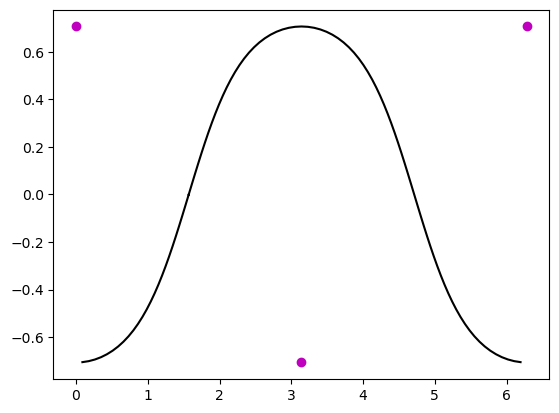

In [35]:
import math

lambda_array = np.linspace(0, 2*np.pi, 101)
theta_array_edgeon = []
phi_array_edgeon = []

#(1/sqrt(2))*(x-z)*sin lambda + y*cos lambda
it = 0
for l in lambda_array:
    theta = np.arctan2((1 + ((np.cos(l))**2))**(1/2), - np.sin(l))
    phi = np.arctan2((2**(1/2)) * np.cos(l), np.sin(l))
    
    if phi < 0:
        phi += 2*np.pi
        it += 1
    if it == 1:
        theta = math.nan
        
    if abs(theta + 0.707) < 1e-1:
        phi = 0
    
    theta_array_edgeon.append(theta)
    phi_array_edgeon.append(phi)
            
plt.plot(phi_array_edgeon, np.cos(theta_array_edgeon), color = 'k')

phi_array_faceon = [0, np.pi, 2*np.pi]

theta_array_faceon = [np.pi/4, 3*np.pi/4, np.pi/4]

plt.scatter(phi_array_faceon, np.cos(theta_array_faceon), color = 'm')

Text(0, 0.5, '$\\cos{\\theta_S}$')

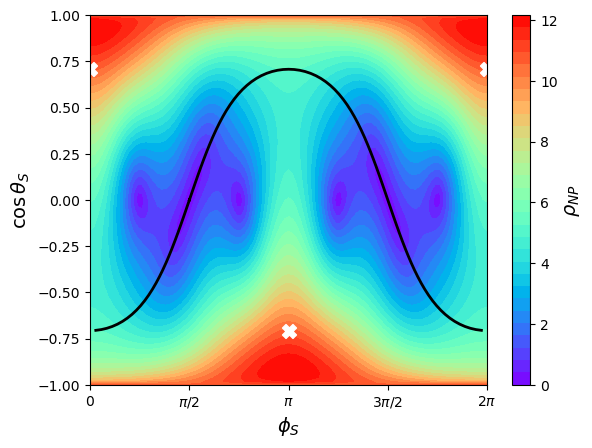

In [36]:
cos_theta_S_arr = np.linspace(-1, 1, 101)

theta_S_arr = np.arccos(cos_theta_S_arr)
phi_S_arr = np.linspace(0, 2*np.pi, 101)

phi_mesh, theta_mesh= np.meshgrid(phi_S_arr, theta_S_arr)


z_array = (SNR_NPNP_S_42_03).T

levels = np.linspace(0, 12.1575, 31)

contour = plt.contourf(phi_mesh, np.cos(theta_mesh), z_array, levels, cmap='rainbow', vmin = 0)

plt.scatter(phi_array_faceon, np.cos(theta_array_faceon), color = 'w', marker='X', s=100)
    
plt.plot(phi_array_edgeon, np.cos(theta_array_edgeon), color = 'k', linewidth=2)
    
x_ticks = np.array([0, np.pi/2, np.pi, 3*np.pi/2, 2*np.pi])
x_labels = [r'$0$', r'$\pi/2$', r'$\pi$', r'$3\pi/2$', r'$2\pi$']

plt.xticks(x_ticks, x_labels)  # Corrected here

# Add a colorbar
cbar = plt.colorbar(contour, boundaries = np.linspace(0, 20, 21), ticks = [0, 2, 4, 6, 8, 10, 12], extend = 'both')
cbar.set_label(r'$\rho_{NP}$', size=14) # Increase fontsize here

plt.xlabel(r'$\phi_{S}}$', fontsize = 14)

plt.ylabel(r'$\cos{\theta_S}$', fontsize = 14)

# fig = plt.gcf()
# fig.savefig('figs/theta_S_phi_S_SNR_NP.pdf',bbox_inches='tight', format='pdf')


Text(0, 0.5, '$\\cos{\\theta_J}$')

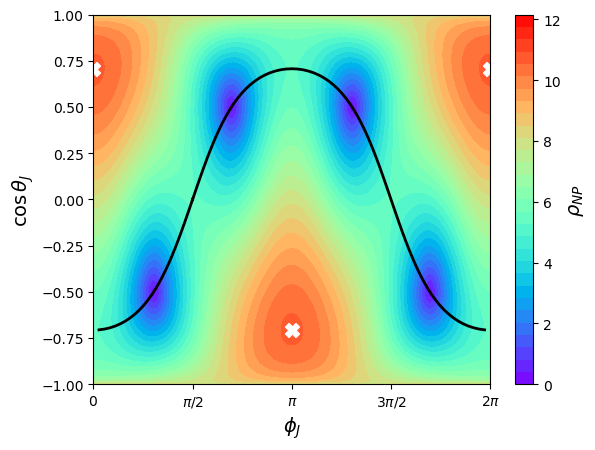

In [37]:
# Create a list of all z arrays
z_array = (SNR_NPNP_J_42_03).T
#
levels = np.linspace(0, 12.1575, 31)

contour = plt.contourf(phi_mesh, np.cos(theta_mesh), z_array, levels, cmap='rainbow', vmin = 0)

plt.scatter(phi_array_faceon, np.cos(theta_array_faceon), color = 'w', marker='X', s=100)
    
plt.plot(phi_array_edgeon, np.cos(theta_array_edgeon), color = 'k', linewidth=2)
    
x_ticks = np.array([0, np.pi/2, np.pi, 3*np.pi/2, 2*np.pi])
x_labels = [r'$0$', r'$\pi/2$', r'$\pi$', r'$3\pi/2$', r'$2\pi$']

plt.xticks(x_ticks, x_labels)  # Corrected here

# Add a colorbar
cbar = plt.colorbar(contour, boundaries = np.linspace(0, 12, 21), ticks = [0, 2, 4, 6, 8, 10, 12], extend = 'both')
cbar.set_label(r'$\rho_{NP}$', size=14) # Increase fontsize here

plt.xlabel(r'$\phi_{J}}$', fontsize = 14)

plt.ylabel(r'$\cos{\theta_J}$', fontsize = 14)

# fig = plt.gcf()
# fig.savefig('figs/theta_J_phi_J_SNR_NP.pdf',bbox_inches='tight', format='pdf')


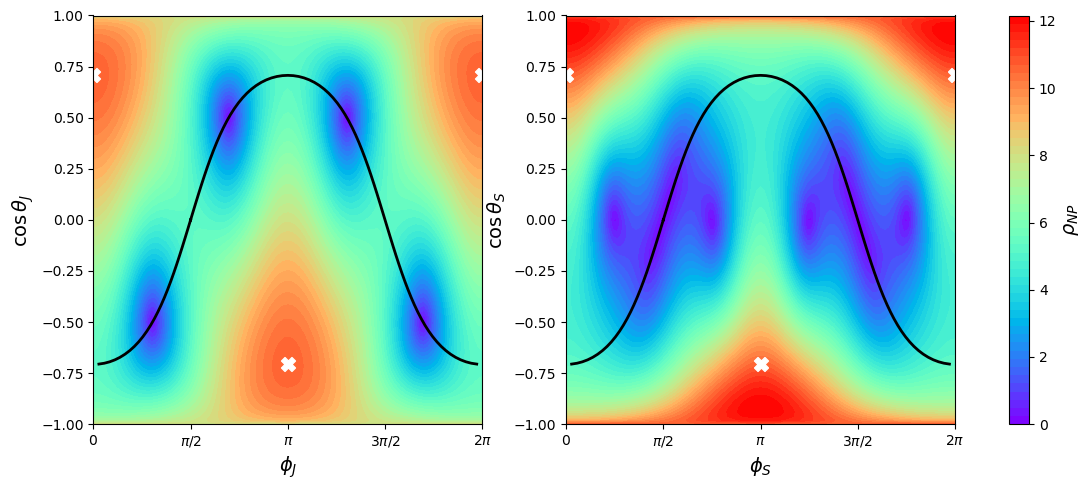

In [38]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,5), sharey=False, sharex=True)

color_levels_row = np.linspace(0, 12.1575, 51)
color_map = 'rainbow'

contour = ax[0].contourf(phi_mesh, np.cos(theta_mesh), (SNR_NPNP_J_42_03).T, color_levels_row, cmap=color_map, vmin = 0)
ax[1].contourf(phi_mesh, np.cos(theta_mesh), (SNR_NPNP_S_42_03).T, color_levels_row, cmap=color_map, vmin = 0)

ax[0].scatter(phi_array_faceon, np.cos(theta_array_faceon), color = 'w', marker='X', s=100)
ax[1].scatter(phi_array_faceon, np.cos(theta_array_faceon), color = 'w', marker='X', s=100)

ax[0].plot(phi_array_edgeon, np.cos(theta_array_edgeon), color = 'k', linewidth=2)
ax[1].plot(phi_array_edgeon, np.cos(theta_array_edgeon), color = 'k', linewidth=2)

x_ticks = np.array([0, np.pi/2, np.pi, 3*np.pi/2, 2*np.pi])
x_labels = [r'$0$', r'$\pi/2$', r'$\pi$', r'$3\pi/2$', r'$2\pi$']

ax[0].set_xlabel(r'$\phi_{J}}$', fontsize = 14)
ax[1].set_xlabel(r'$\phi_{S}}$', fontsize = 14)

ax[0].set_ylabel(r'$\cos{\theta_J}$', fontsize = 14)
ax[1].set_ylabel(r'$\cos{\theta_S}$', fontsize = 14)

ax[0].set_xticks(x_ticks, x_labels)  # Corrected here
ax[1].set_xticks(x_ticks, x_labels)  # Corrected here

plt.tight_layout()

cbar = fig.colorbar(contour, ax=ax[:].ravel().tolist(), orientation='vertical', boundaries = np.linspace(0, 12, 21), ticks = [0, 2, 4, 6, 8, 10, 12], extend = 'both')
# Add a colorbar
cbar.set_label(r'$\rho_{NP}$', fontweight='bold', fontsize = 14) # Increase fontsize here

fig1 = plt.gcf()
fig1.savefig('figs/theta_J_phi_J_theta_S_phi_S_SNR_NP.pdf',bbox_inches='tight', format='pdf')

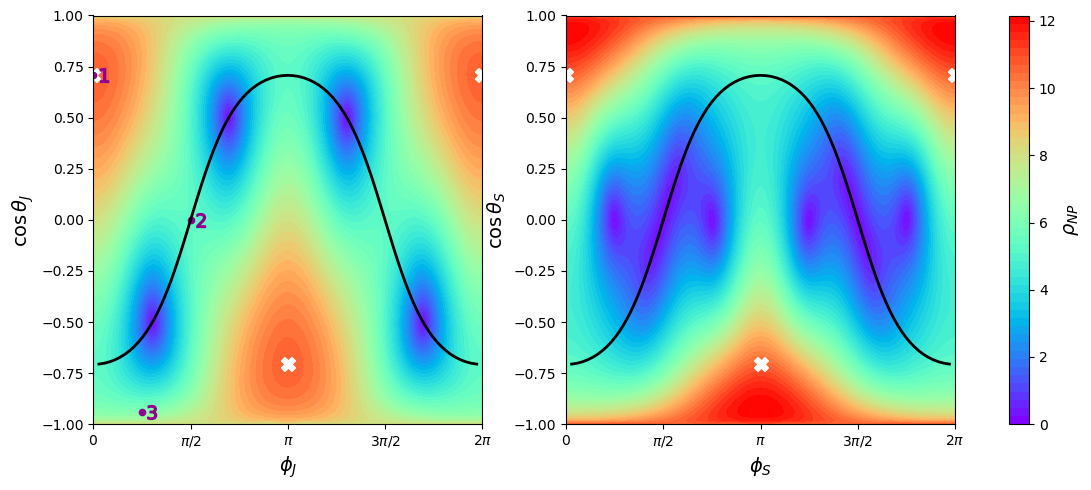

In [39]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,5), sharey=False, sharex=True)

color_levels_row = np.linspace(0, 12.1575, 51)
color_map = 'rainbow'

contour = ax[0].contourf(phi_mesh, np.cos(theta_mesh), (SNR_NPNP_J_42_03).T, color_levels_row, cmap=color_map, vmin = 0)
ax[1].contourf(phi_mesh, np.cos(theta_mesh), (SNR_NPNP_S_42_03).T, color_levels_row, cmap=color_map, vmin = 0)

ax[0].scatter(phi_array_faceon, np.cos(theta_array_faceon), color = 'w', marker='X', s=100)
ax[1].scatter(phi_array_faceon, np.cos(theta_array_faceon), color = 'w', marker='X', s=100)

ax[0].plot(phi_array_edgeon, np.cos(theta_array_edgeon), color = 'k', linewidth=2)
ax[1].plot(phi_array_edgeon, np.cos(theta_array_edgeon), color = 'k', linewidth=2)

ax[0].scatter(0, np.cos(np.pi/4), color = '#900090', marker='o', s=20)
ax[0].scatter(np.pi/2, np.cos(np.pi/2), color = '#900090', marker='o', s=20)
ax[0].scatter(np.pi/4, np.cos(8*np.pi/9), color = '#900090', marker='o', s=20)

ax[0].scatter(0.15, np.cos(np.pi/4), color = '#900090', marker=r'$1$', s=100)
ax[0].scatter(np.pi/2+0.15, np.cos(np.pi/2), color = '#900090', marker=r'$2$', s=100)
ax[0].scatter(np.pi/4+0.15, np.cos(8*np.pi/9), color = '#900090', marker=r'$3$', s=100)


x_ticks = np.array([0, np.pi/2, np.pi, 3*np.pi/2, 2*np.pi])
x_labels = [r'$0$', r'$\pi/2$', r'$\pi$', r'$3\pi/2$', r'$2\pi$']

ax[0].set_xlabel(r'$\phi_{J}}$', fontsize = 14)
ax[1].set_xlabel(r'$\phi_{S}}$', fontsize = 14)

ax[0].set_ylabel(r'$\cos{\theta_J}$', fontsize = 14)
ax[1].set_ylabel(r'$\cos{\theta_S}$', fontsize = 14)

ax[0].set_xticks(x_ticks, x_labels)  # Corrected here
ax[1].set_xticks(x_ticks, x_labels)  # Corrected here

plt.tight_layout()

cbar = fig.colorbar(contour, ax=ax[:].ravel().tolist(), orientation='vertical', boundaries = np.linspace(0, 12, 21), ticks = [0, 2, 4, 6, 8, 10, 12], extend = 'both')
# Add a colorbar
cbar.set_label(r'$\rho_{NP}$', fontweight='bold', fontsize = 14) # Increase fontsize here

fig1 = plt.gcf()
fig1.savefig('figs/theta_J_phi_J_theta_S_phi_S_SNR_NP_w_sys.pdf',bbox_inches='tight', format='pdf')

Now Lindblom contours -- begining with $\cos{\theta_S}$ vs $\phi_S$ for redshift z = 0.1

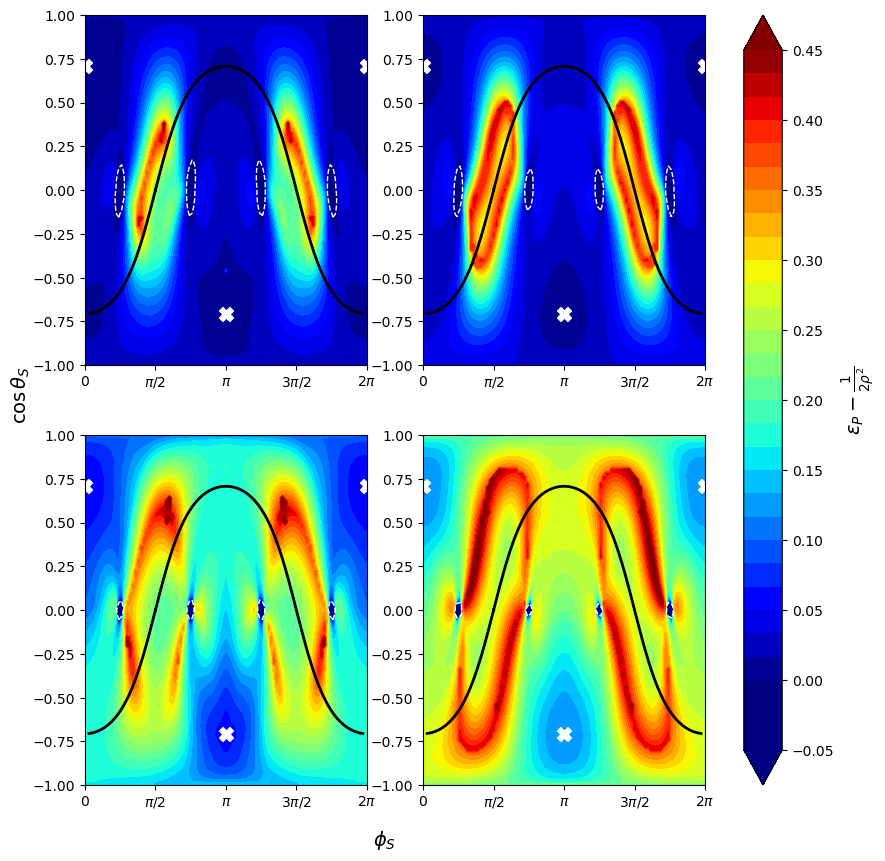

In [40]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))




# Create a list of all z arrays
z_arrays = [(Mismatch_2d_S_42_01 - lindblom_RPRP_S_42_01).T, (Mismatch_2d_S_43_01 - lindblom_RPRP_S_43_01).T, (Mismatch_2d_S_82_01 - lindblom_RPRP_S_82_01).T, (Mismatch_2d_S_83_01 - lindblom_RPRP_S_83_01).T]

#
levels = np.linspace(-0.05, 0.45, 31)


for i, ax in enumerate(axs.flat):
    contour = ax.contourf(phi_mesh, np.cos(theta_mesh), z_arrays[i], levels, cmap='jet', vmin = 0, vmax = 0.45, extend = 'both')
    
    contourlines1 = ax.contour(phi_mesh, np.cos(theta_mesh), z_arrays[i], levels = [0], colors='white', linewidths=1, linestyles = '--')
    
    ax.scatter(phi_array_faceon, np.cos(theta_array_faceon), color = 'w', marker='X', s=100)
    
    ax.plot(phi_array_edgeon, np.cos(theta_array_edgeon), color = 'k', linewidth=2)
    
    x_ticks = np.array([0, np.pi/2, np.pi, 3*np.pi/2, 2*np.pi])
    x_labels = [r'$0$', r'$\pi/2$', r'$\pi$', r'$3\pi/2$', r'$2\pi$']

    ax.set_xticks(x_ticks)
    ax.set_xticklabels(x_labels)

# Add a colorbar

cbar = fig.colorbar(contour, ax=axs.ravel().tolist(), boundaries = np.linspace(-0.05, 0.45, 21), ticks = [-0.05, 0, 0.05, 0.1, 0.15, 0.20, 0.25, 0.3, 0.35, 0.4, 0.45], extend = 'both')
cbar.set_label(r'$\epsilon_{P} - \frac{1}{2\rho^2}$', size=14) # Increase fontsize here


fig.text(x=0.425, y=0.05, s=r'$\phi_{S}}$', ha='center', fontweight='bold', fontsize = 14) 
fig.text(x=0.05, y=0.5, s=r'$\cos{\theta_S}$', va='center', fontweight='bold', rotation='vertical', fontsize = 14)

fig.set_facecolor('none')


For z = 0.2

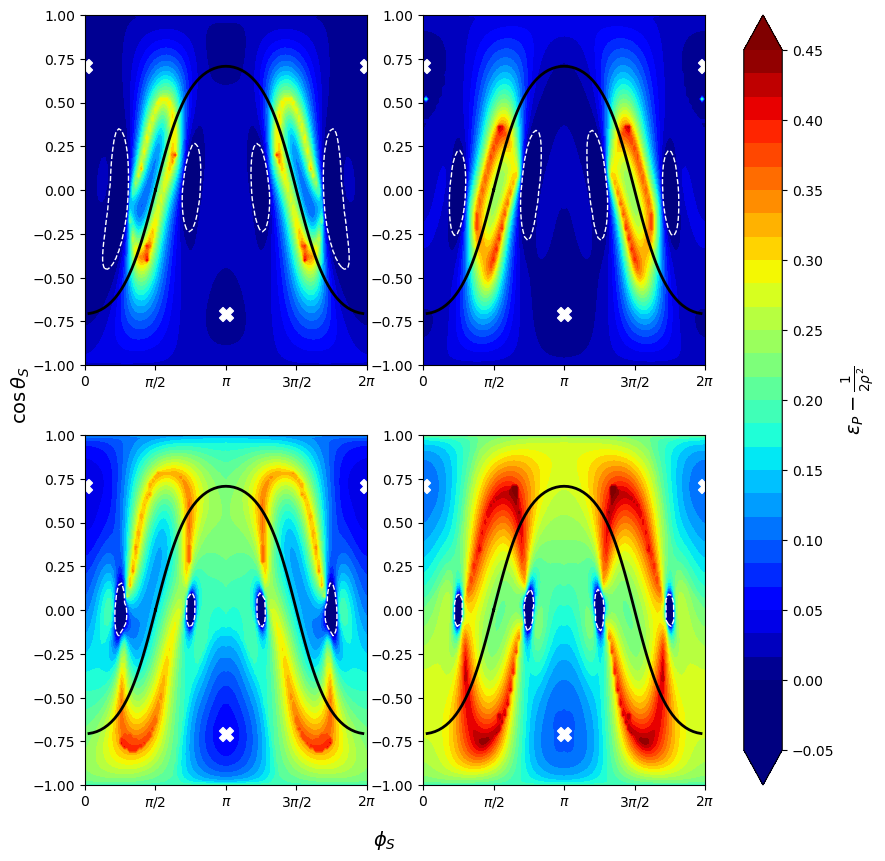

In [41]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))




# Create a list of all z arrays
z_arrays = [(Mismatch_2d_S_42_02 - lindblom_RPRP_S_42_02).T, (Mismatch_2d_S_43_02 - lindblom_RPRP_S_43_02).T, (Mismatch_2d_S_82_02 - lindblom_RPRP_S_82_02).T, (Mismatch_2d_S_83_02 - lindblom_RPRP_S_83_02).T]

#
levels = np.linspace(-0.05, 0.45, 31)


for i, ax in enumerate(axs.flat):
    contour = ax.contourf(phi_mesh, np.cos(theta_mesh), z_arrays[i], levels, cmap='jet', vmin = 0, vmax = 0.45, extend = 'both')
    
    contourlines1 = ax.contour(phi_mesh, np.cos(theta_mesh), z_arrays[i], levels = [0], colors='white', linewidths=1, linestyles = '--')
    
    ax.scatter(phi_array_faceon, np.cos(theta_array_faceon), color = 'w', marker='X', s=100)
    
    ax.plot(phi_array_edgeon, np.cos(theta_array_edgeon), color = 'k', linewidth=2)
    
    x_ticks = np.array([0, np.pi/2, np.pi, 3*np.pi/2, 2*np.pi])
    x_labels = [r'$0$', r'$\pi/2$', r'$\pi$', r'$3\pi/2$', r'$2\pi$']

    ax.set_xticks(x_ticks)
    ax.set_xticklabels(x_labels)

# Add a colorbar

cbar = fig.colorbar(contour, ax=axs.ravel().tolist(), boundaries = np.linspace(-0.05, 0.45, 21), ticks = [-0.05, 0, 0.05, 0.1, 0.15, 0.20, 0.25, 0.3, 0.35, 0.4, 0.45], extend = 'both')
cbar.set_label(r'$\epsilon_{P} - \frac{1}{2\rho^2}$', size=14) # Increase fontsize here


fig.text(x=0.425, y=0.05, s=r'$\phi_{S}}$', ha='center', fontweight='bold', fontsize = 14) 
fig.text(x=0.05, y=0.5, s=r'$\cos{\theta_S}$', va='center', fontweight='bold', rotation='vertical', fontsize = 14)

fig.set_facecolor('none')


We use z = 0.3, so here is the contour

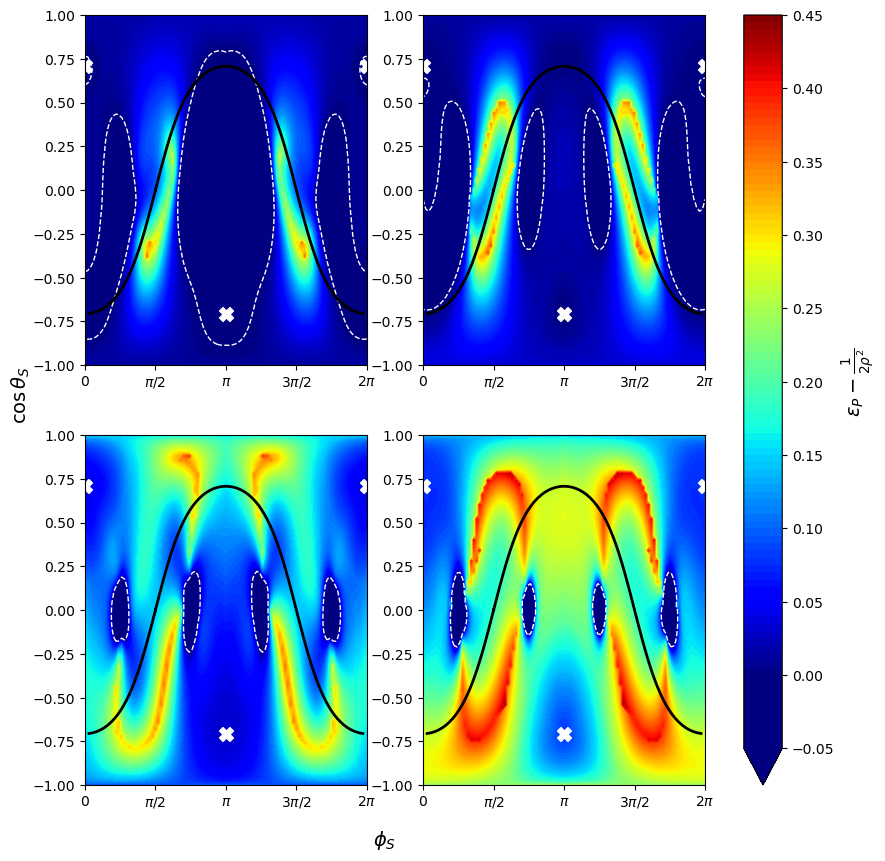

In [58]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))




# Create a list of all z arrays
z_arrays = [(Mismatch_2d_S_42_03 - lindblom_RPRP_S_42_03).T, (Mismatch_2d_S_43_03 - lindblom_RPRP_S_43_03).T, (Mismatch_2d_S_82_03 - lindblom_RPRP_S_82_03).T, (Mismatch_2d_S_83_03 - lindblom_RPRP_S_83_03).T]

#
levels = np.linspace(-0.05, 0.45, 101)


for i, ax in enumerate(axs.flat):
    contour = ax.contourf(phi_mesh, np.cos(theta_mesh), z_arrays[i], levels, cmap='jet', vmin = 0, vmax = 0.45, extend = 'min')
    
    contourlines1 = ax.contour(phi_mesh, np.cos(theta_mesh), z_arrays[i], levels = [0], colors='white', linewidths=1, linestyles = '--')
    
    ax.scatter(phi_array_faceon, np.cos(theta_array_faceon), color = 'w', marker='X', s=100)
    
    ax.plot(phi_array_edgeon, np.cos(theta_array_edgeon), color = 'k', linewidth=2)
    
    x_ticks = np.array([0, np.pi/2, np.pi, 3*np.pi/2, 2*np.pi])
    x_labels = [r'$0$', r'$\pi/2$', r'$\pi$', r'$3\pi/2$', r'$2\pi$']

    ax.set_xticks(x_ticks)
    ax.set_xticklabels(x_labels)

# Add a colorbar

cbar = fig.colorbar(contour, ax=axs.ravel().tolist(), boundaries = np.linspace(-0.05, 0.45, 101), ticks = [-0.05, 0, 0.05, 0.1, 0.15, 0.20, 0.25, 0.3, 0.35, 0.4, 0.45], extend = 'min')
cbar.set_label(r'$\epsilon_{P} - \frac{1}{2\rho^2}$', size=14) # Increase fontsize here


fig.text(x=0.425, y=0.05, s=r'$\phi_{S}}$', ha='center', fontweight='bold', fontsize = 14) 
fig.text(x=0.05, y=0.5, s=r'$\cos{\theta_S}$', va='center', fontweight='bold', rotation='vertical', fontsize = 14)

fig.set_facecolor('none')

fig = plt.gcf()
fig.savefig('figs/mismatch_contour_thetaS_phiS_rs_z03.pdf',bbox_inches='tight', format='pdf')


Now, for $\cos{\theta_J}$ vs $\phi_J$ with z = 0.1

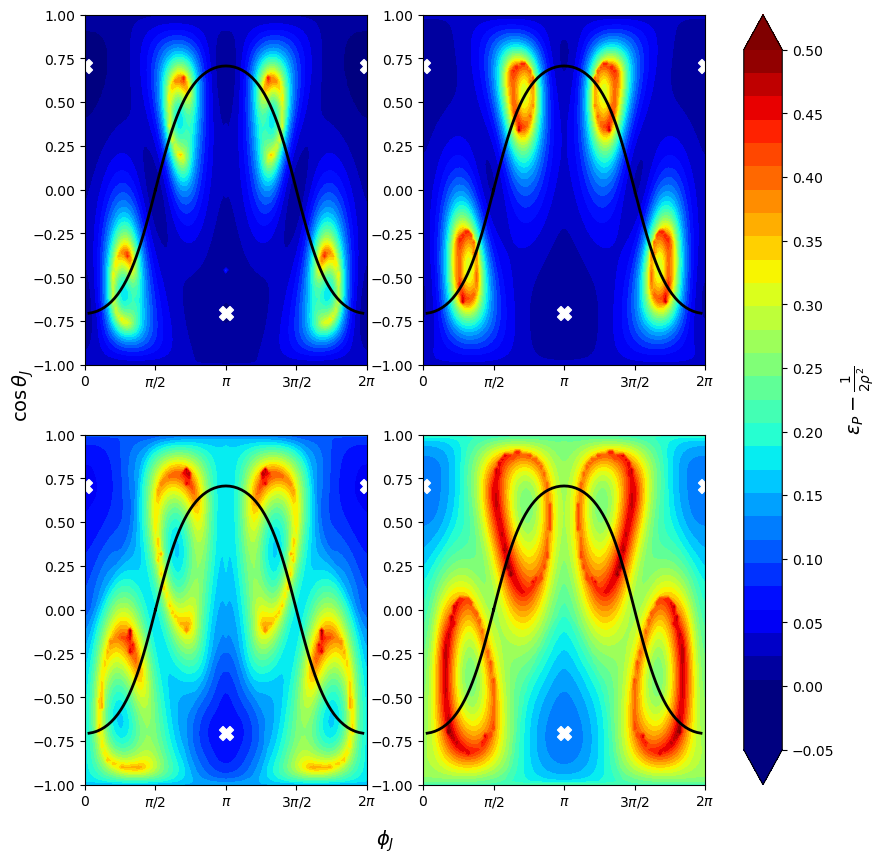

In [43]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))




# Create a list of all z arrays
z_arrays = [(Mismatch_2d_J_42_01 - lindblom_RPRP_J_42_01).T, (Mismatch_2d_J_43_01 - lindblom_RPRP_J_43_01).T, (Mismatch_2d_J_82_01 - lindblom_RPRP_J_82_01).T, (Mismatch_2d_J_83_01 - lindblom_RPRP_J_83_01).T]

#
levels = np.linspace(-0.05, 0.5, 31)


for i, ax in enumerate(axs.flat):
    contour = ax.contourf(phi_mesh, np.cos(theta_mesh), z_arrays[i], levels, cmap='jet', vmin = 0, vmax = 0.5, extend = 'both')
    
    contourlines1 = ax.contour(phi_mesh, np.cos(theta_mesh), z_arrays[i], levels = [0], colors='white', linewidths=1, linestyles = '--')
    
    ax.scatter(phi_array_faceon, np.cos(theta_array_faceon), color = 'w', marker='X', s=100)
    
    ax.plot(phi_array_edgeon, np.cos(theta_array_edgeon), color = 'k', linewidth=2)
    
    x_ticks = np.array([0, np.pi/2, np.pi, 3*np.pi/2, 2*np.pi])
    x_labels = [r'$0$', r'$\pi/2$', r'$\pi$', r'$3\pi/2$', r'$2\pi$']

    ax.set_xticks(x_ticks)
    ax.set_xticklabels(x_labels)

# Add a colorbar

cbar = fig.colorbar(contour, ax=axs.ravel().tolist(), boundaries = np.linspace(-0.05, 0.5, 21), ticks = [-0.05, 0, 0.05, 0.1, 0.15, 0.20, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5], extend = 'both')
cbar.set_label(r'$\epsilon_{P} - \frac{1}{2\rho^2}$', size=14) # Increase fontsize here


fig.text(x=0.425, y=0.05, s=r'$\phi_{J}}$', ha='center', fontweight='bold', fontsize = 14) 
fig.text(x=0.05, y=0.5, s=r'$\cos{\theta_J}$', va='center', fontweight='bold', rotation='vertical', fontsize = 14)

fig.set_facecolor('none')


z = 0.2

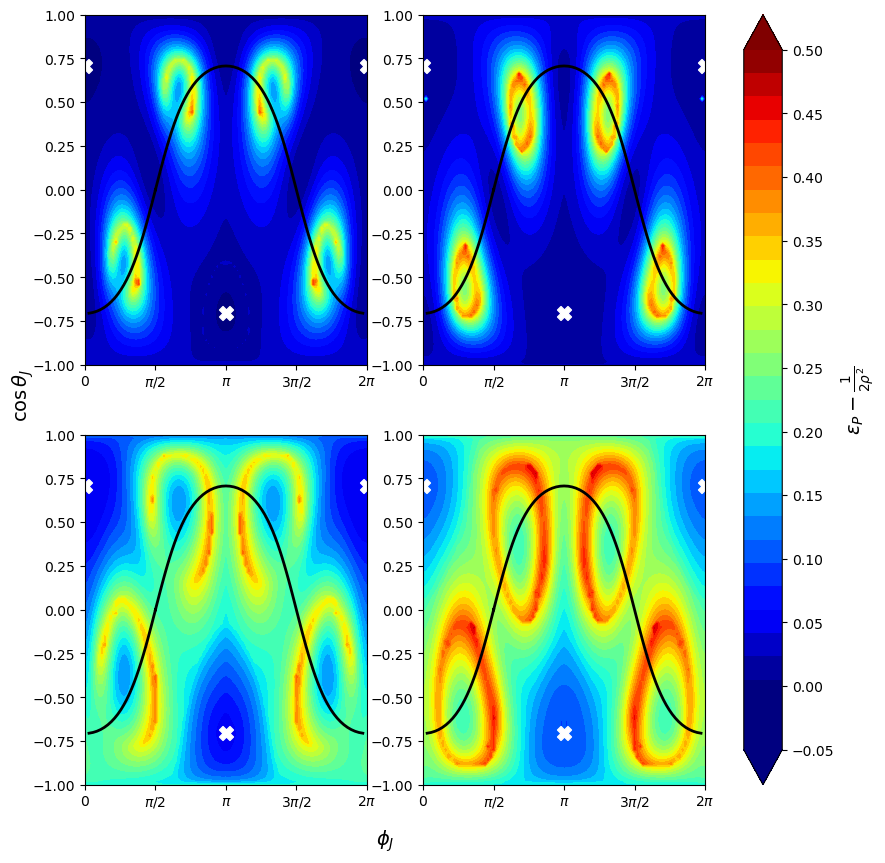

In [44]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))




# Create a list of all z arrays
z_arrays = [(Mismatch_2d_J_42_02 - lindblom_RPRP_J_42_02).T, (Mismatch_2d_J_43_02 - lindblom_RPRP_J_43_02).T, (Mismatch_2d_J_82_02 - lindblom_RPRP_J_82_02).T, (Mismatch_2d_J_83_02 - lindblom_RPRP_J_83_02).T]

#
levels = np.linspace(-0.05, 0.5, 31)


for i, ax in enumerate(axs.flat):
    contour = ax.contourf(phi_mesh, np.cos(theta_mesh), z_arrays[i], levels, cmap='jet', vmin = 0, vmax = 0.5, extend = 'both')
    
    contourlines1 = ax.contour(phi_mesh, np.cos(theta_mesh), z_arrays[i], levels = [0], colors='white', linewidths=1, linestyles = '--')
    
    ax.scatter(phi_array_faceon, np.cos(theta_array_faceon), color = 'w', marker='X', s=100)
    
    ax.plot(phi_array_edgeon, np.cos(theta_array_edgeon), color = 'k', linewidth=2)
    
    x_ticks = np.array([0, np.pi/2, np.pi, 3*np.pi/2, 2*np.pi])
    x_labels = [r'$0$', r'$\pi/2$', r'$\pi$', r'$3\pi/2$', r'$2\pi$']

    ax.set_xticks(x_ticks)
    ax.set_xticklabels(x_labels)

# Add a colorbar

cbar = fig.colorbar(contour, ax=axs.ravel().tolist(), boundaries = np.linspace(-0.05, 0.5, 21), ticks = [-0.05, 0, 0.05, 0.1, 0.15, 0.20, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5], extend = 'both')
cbar.set_label(r'$\epsilon_{P} - \frac{1}{2\rho^2}$', size=14) # Increase fontsize here


fig.text(x=0.425, y=0.05, s=r'$\phi_{J}}$', ha='center', fontweight='bold', fontsize = 14) 
fig.text(x=0.05, y=0.5, s=r'$\cos{\theta_J}$', va='center', fontweight='bold', rotation='vertical', fontsize = 14)

fig.set_facecolor('none')


finally we use z = 0.3, here the contour for that redshift

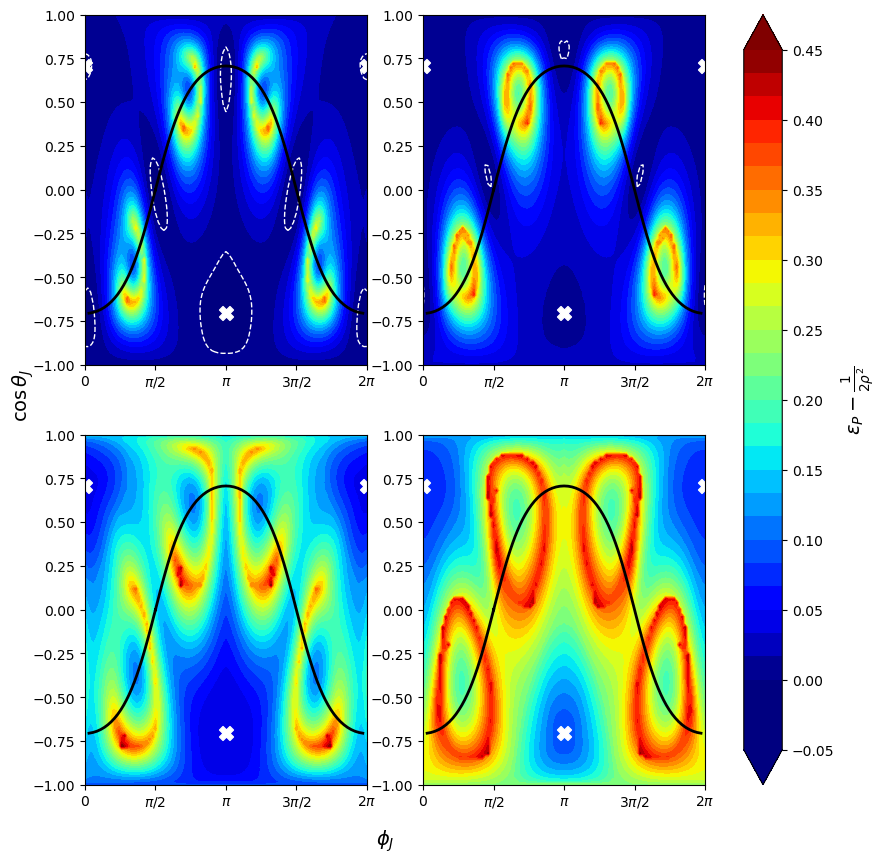

In [45]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))




# Create a list of all z arrays
z_arrays = [(Mismatch_2d_J_42_03 - lindblom_RPRP_J_42_03).T, (Mismatch_2d_J_43_03 - lindblom_RPRP_J_43_03).T, (Mismatch_2d_J_82_03 - lindblom_RPRP_J_82_03).T, (Mismatch_2d_J_83_03 - lindblom_RPRP_J_83_03).T]

#
levels = np.linspace(-0.05, 0.45, 31)


for i, ax in enumerate(axs.flat):
    contour = ax.contourf(phi_mesh, np.cos(theta_mesh), z_arrays[i], levels, cmap='jet', vmin = 0, vmax = 0.45, extend = 'both')
    
    contourlines1 = ax.contour(phi_mesh, np.cos(theta_mesh), z_arrays[i], levels = [0], colors='white', linewidths=1, linestyles = '--')
    
    ax.scatter(phi_array_faceon, np.cos(theta_array_faceon), color = 'w', marker='X', s=100)
    
    ax.plot(phi_array_edgeon, np.cos(theta_array_edgeon), color = 'k', linewidth=2)
    
    x_ticks = np.array([0, np.pi/2, np.pi, 3*np.pi/2, 2*np.pi])
    x_labels = [r'$0$', r'$\pi/2$', r'$\pi$', r'$3\pi/2$', r'$2\pi$']

    ax.set_xticks(x_ticks)
    ax.set_xticklabels(x_labels)

# Add a colorbar

cbar = fig.colorbar(contour, ax=axs.ravel().tolist(), boundaries = np.linspace(-0.05, 0.45, 21), ticks = [-0.05, 0, 0.05, 0.1, 0.15, 0.20, 0.25, 0.3, 0.35, 0.4, 0.45], extend = 'both')
cbar.set_label(r'$\epsilon_{P} - \frac{1}{2\rho^2}$', size=14) # Increase fontsize here


fig.text(x=0.425, y=0.05, s=r'$\phi_{J}}$', ha='center', fontweight='bold', fontsize = 14) 
fig.text(x=0.05, y=0.5, s=r'$\cos{\theta_J}$', va='center', fontweight='bold', rotation='vertical', fontsize = 14)

fig.set_facecolor('none')

fig = plt.gcf()
fig.savefig('figs/mismatch_contour_thetaJ_phiJ_rs_z03.pdf', bbox_inches='tight',format='pdf')


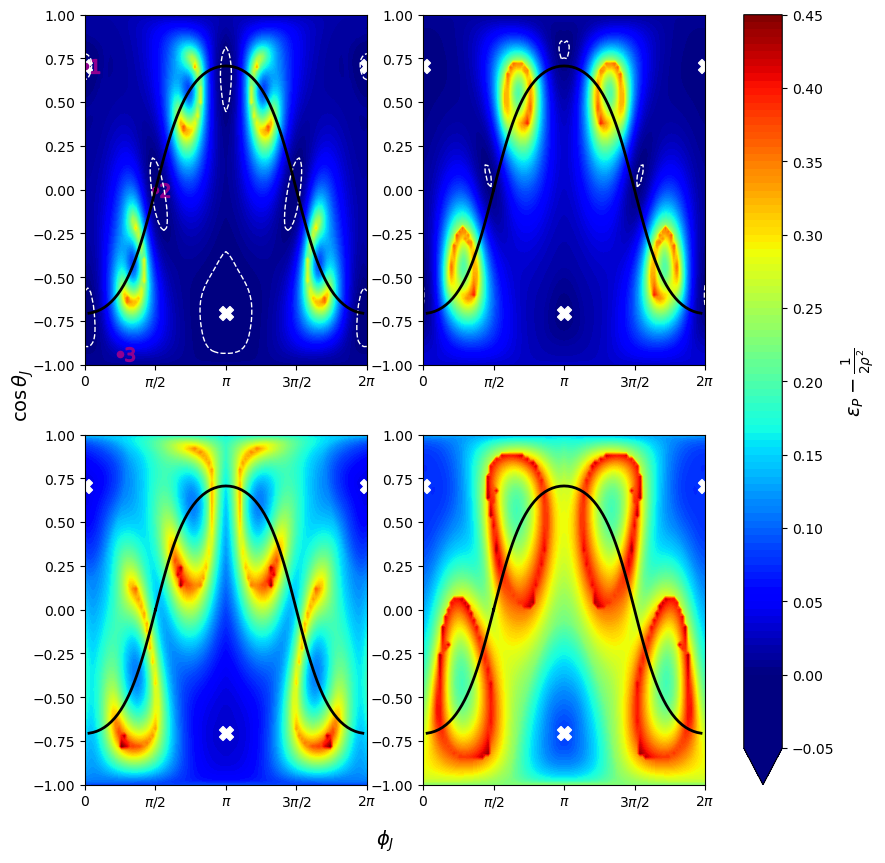

In [57]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))




# Create a list of all z arrays
z_arrays = [(Mismatch_2d_J_42_03 - lindblom_RPRP_J_42_03).T, (Mismatch_2d_J_43_03 - lindblom_RPRP_J_43_03).T, (Mismatch_2d_J_82_03 - lindblom_RPRP_J_82_03).T, (Mismatch_2d_J_83_03 - lindblom_RPRP_J_83_03).T]

#
levels = np.linspace(-0.05, 0.45, 101)


for i, ax in enumerate(axs.flat):
    contour = ax.contourf(phi_mesh, np.cos(theta_mesh), z_arrays[i], levels, cmap='jet', vmin = 0, vmax = 0.45, extend = 'min')
    
    contourlines1 = ax.contour(phi_mesh, np.cos(theta_mesh), z_arrays[i], levels = [0], colors='white', linewidths=1, linestyles = '--')
    
    ax.scatter(phi_array_faceon, np.cos(theta_array_faceon), color = 'w', marker='X', s=100)
    
    ax.plot(phi_array_edgeon, np.cos(theta_array_edgeon), color = 'k', linewidth=2)
    
    if i == 0:
        ax.scatter(0, np.cos(np.pi/4), color = '#900090', marker='o', s=20)
        ax.scatter(np.pi/2, np.cos(np.pi/2), color = '#900090', marker='o', s=20)
        ax.scatter(np.pi/4, np.cos(8*np.pi/9), color = '#900090', marker='o', s=20)
        
        ax.scatter(0.2, np.cos(np.pi/4), color = '#900090', marker=r'$1$', s=100)
        ax.scatter(np.pi/2+0.2, np.cos(np.pi/2), color = '#900090', marker=r'$2$', s=100)
        ax.scatter(np.pi/4+0.2, np.cos(8*np.pi/9), color = '#900090', marker=r'$3$', s=100)
    
    x_ticks = np.array([0, np.pi/2, np.pi, 3*np.pi/2, 2*np.pi])
    x_labels = [r'$0$', r'$\pi/2$', r'$\pi$', r'$3\pi/2$', r'$2\pi$']

    ax.set_xticks(x_ticks)
    ax.set_xticklabels(x_labels)

# Add a colorbar

cbar = fig.colorbar(contour, ax=axs.ravel().tolist(), boundaries = np.linspace(-0.05, 0.45, 101), ticks = [-0.05, 0, 0.05, 0.1, 0.15, 0.20, 0.25, 0.3, 0.35, 0.4, 0.45], extend = 'min')
cbar.set_label(r'$\epsilon_{P} - \frac{1}{2\rho^2}$', size=14) # Increase fontsize here


fig.text(x=0.425, y=0.05, s=r'$\phi_{J}}$', ha='center', fontweight='bold', fontsize = 14) 
fig.text(x=0.05, y=0.5, s=r'$\cos{\theta_J}$', va='center', fontweight='bold', rotation='vertical', fontsize = 14)

fig.set_facecolor('none')

fig = plt.gcf()
fig.savefig('figs/mismatch_contour_thetaJ_phiJ_rs_z03_w_sys.pdf', bbox_inches='tight',format='pdf')


We can make both contours with shared colorbars -- 

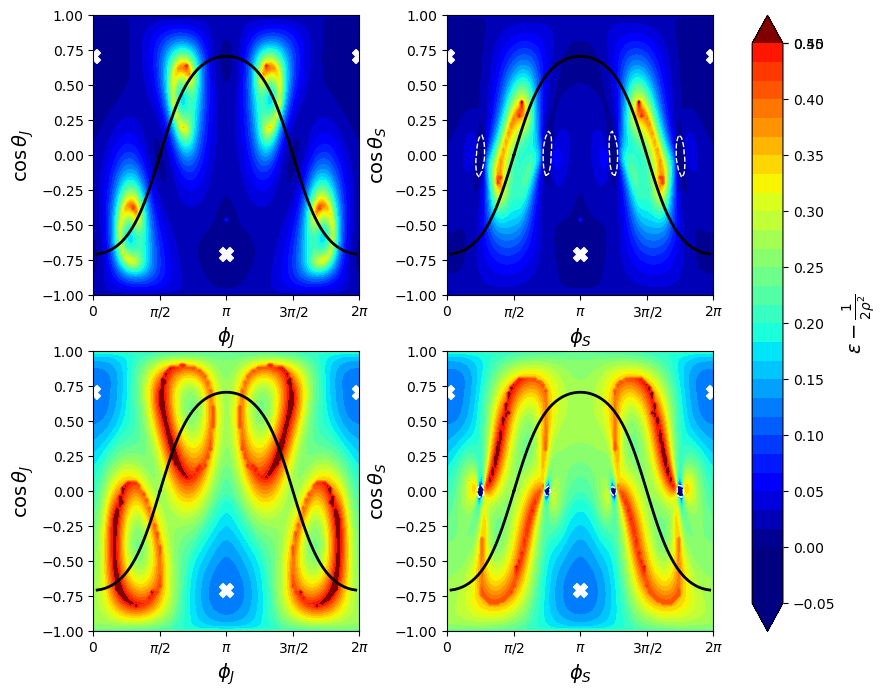

In [47]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

fig.subplots_adjust(wspace=0.33)

cos_theta_arr = np.linspace(-1, 1, 101)
phi_mesh = np.linspace(0, 2*np.pi, 101)
theta_mesh = np.arccos(cos_theta_arr)


X, Y = np.meshgrid(phi_mesh, theta_mesh)

z_arrays = [(Mismatch_2d_J_42_01 - lindblom_RPRP_J_42_01).T, (Mismatch_2d_S_42_01 - lindblom_RPRP_S_42_01).T, (Mismatch_2d_J_83_01 - lindblom_RPRP_J_83_01).T, (Mismatch_2d_S_83_01 - lindblom_RPRP_S_83_01).T]

for i, ax in enumerate(axs.flat):
    contour = ax.contourf(X, np.cos(Y), z_arrays[i], levels, cmap='jet', vmin = 0, vmax = 0.5, extend = 'both')
    
    contourlines1 = ax.contour(X, np.cos(Y), z_arrays[i], levels = [0], colors='white', linewidths=1, linestyles = '--')
    
    
    ax.scatter(phi_array_faceon, np.cos(theta_array_faceon), color = 'w', marker='X', s=100)
    
    ax.plot(phi_array_edgeon, np.cos(theta_array_edgeon), color = 'k', linewidth=2)
    
    if i%2 == 0:
        ax.set_xlabel(r'$\phi_J$', fontsize = 14)
        ax.set_ylabel(r'$\cos{\theta_J}$', fontsize = 14)

    else:
        ax.set_xlabel(r'$\phi_S$', fontsize = 14)
        ax.set_ylabel(r'$\cos{\theta_S}$', fontsize = 14)
    
    x_ticks = np.array([0, np.pi/2, np.pi, 3*np.pi/2, 2*np.pi])
    x_labels = [r'$0$', r'$\pi/2$', r'$\pi$', r'$3\pi/2$', r'$2\pi$']

    ax.set_xticks(x_ticks)
    ax.set_xticklabels(x_labels)

# Add a colorbar

cbar = fig.colorbar(contour, ax=axs.ravel().tolist(), boundaries = np.linspace(-0.05, 0.5, 11), ticks = [-0.05, 0, 0.05, 0.1, 0.15, 0.20, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5], extend = 'both')
cbar.set_label(r'$\epsilon - \frac{1}{2\rho^2}$', size=14) # Increase fontsize here




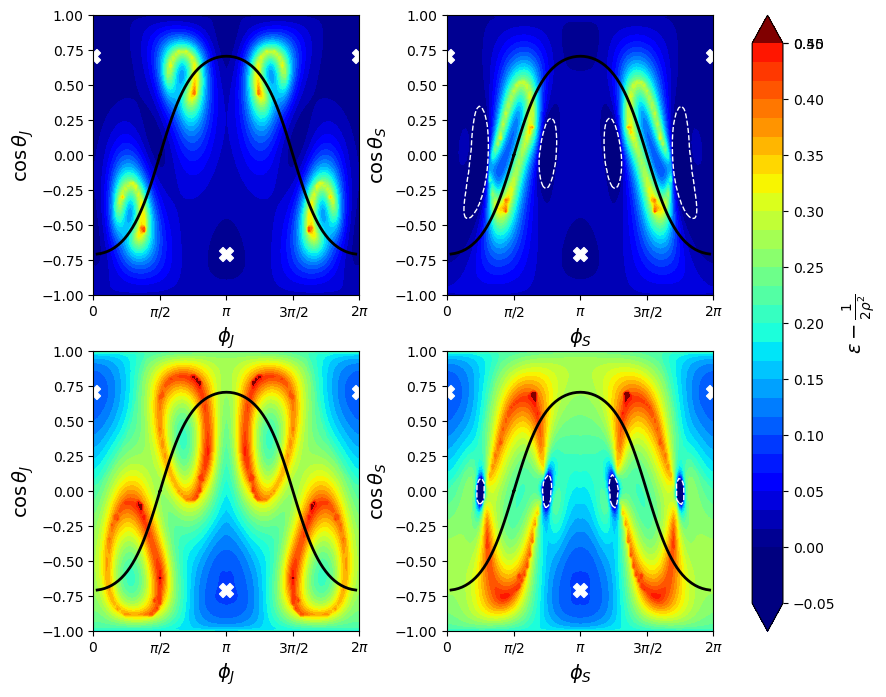

In [48]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

fig.subplots_adjust(wspace=0.33)

cos_theta_arr = np.linspace(-1, 1, 101)
phi_mesh = np.linspace(0, 2*np.pi, 101)
theta_mesh = np.arccos(cos_theta_arr)


X, Y = np.meshgrid(phi_mesh, theta_mesh)

z_arrays = [(Mismatch_2d_J_42_02 - lindblom_RPRP_J_42_02).T, (Mismatch_2d_S_42_02 - lindblom_RPRP_S_42_02).T, (Mismatch_2d_J_83_02 - lindblom_RPRP_J_83_02).T, (Mismatch_2d_S_83_02 - lindblom_RPRP_S_83_02).T]

for i, ax in enumerate(axs.flat):
    contour = ax.contourf(X, np.cos(Y), z_arrays[i], levels, cmap='jet', vmin = 0, vmax = 0.5, extend = 'both')
    
    contourlines1 = ax.contour(X, np.cos(Y), z_arrays[i], levels = [0], colors='white', linewidths=1, linestyles = '--')
    
    
    ax.scatter(phi_array_faceon, np.cos(theta_array_faceon), color = 'w', marker='X', s=100)
    
    ax.plot(phi_array_edgeon, np.cos(theta_array_edgeon), color = 'k', linewidth=2)
    
    if i%2 == 0:
        ax.set_xlabel(r'$\phi_J$', fontsize = 14)
        ax.set_ylabel(r'$\cos{\theta_J}$', fontsize = 14)

    else:
        ax.set_xlabel(r'$\phi_S$', fontsize = 14)
        ax.set_ylabel(r'$\cos{\theta_S}$', fontsize = 14)
    
    x_ticks = np.array([0, np.pi/2, np.pi, 3*np.pi/2, 2*np.pi])
    x_labels = [r'$0$', r'$\pi/2$', r'$\pi$', r'$3\pi/2$', r'$2\pi$']

    ax.set_xticks(x_ticks)
    ax.set_xticklabels(x_labels)

# Add a colorbar

cbar = fig.colorbar(contour, ax=axs.ravel().tolist(), boundaries = np.linspace(-0.05, 0.5, 11), ticks = [-0.05, 0, 0.05, 0.1, 0.15, 0.20, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5], extend = 'both')
cbar.set_label(r'$\epsilon - \frac{1}{2\rho^2}$', size=14) # Increase fontsize here




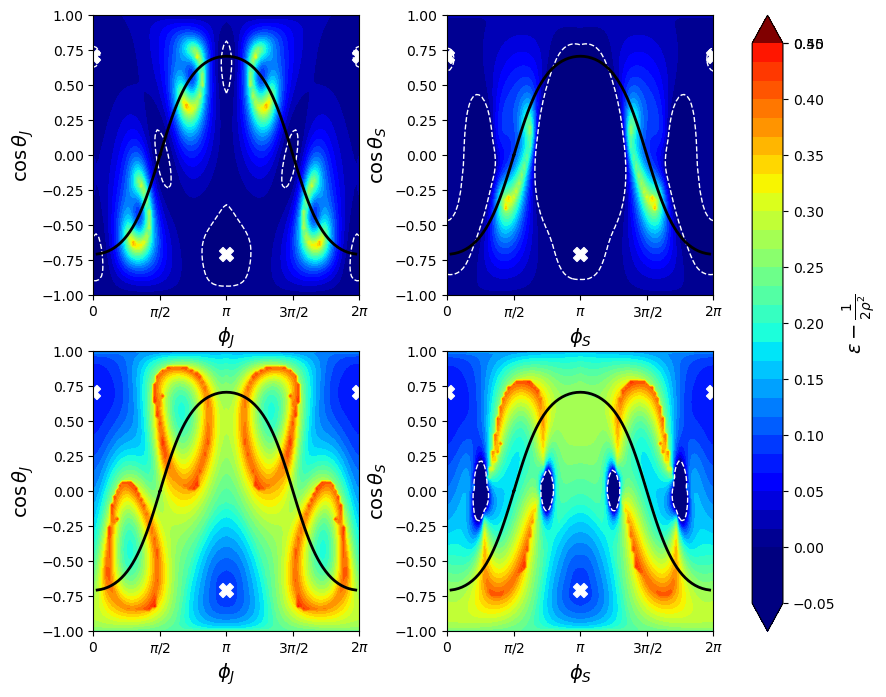

In [49]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

fig.subplots_adjust(wspace=0.33)

cos_theta_arr = np.linspace(-1, 1, 101)
phi_mesh = np.linspace(0, 2*np.pi, 101)
theta_mesh = np.arccos(cos_theta_arr)


X, Y = np.meshgrid(phi_mesh, theta_mesh)

z_arrays = [(Mismatch_2d_J_42_03 - lindblom_RPRP_J_42_03).T, (Mismatch_2d_S_42_03 - lindblom_RPRP_S_42_03).T, (Mismatch_2d_J_83_03 - lindblom_RPRP_J_83_03).T, (Mismatch_2d_S_83_03 - lindblom_RPRP_S_83_03).T]

for i, ax in enumerate(axs.flat):
    contour = ax.contourf(X, np.cos(Y), z_arrays[i], levels, cmap='jet', vmin = 0, vmax = 0.5, extend = 'both')
    
    contourlines1 = ax.contour(X, np.cos(Y), z_arrays[i], levels = [0], colors='white', linewidths=1, linestyles = '--')
    
    
    ax.scatter(phi_array_faceon, np.cos(theta_array_faceon), color = 'w', marker='X', s=100)
    
    ax.plot(phi_array_edgeon, np.cos(theta_array_edgeon), color = 'k', linewidth=2)
    
    if i%2 == 0:
        ax.set_xlabel(r'$\phi_J$', fontsize = 14)
        ax.set_ylabel(r'$\cos{\theta_J}$', fontsize = 14)

    else:
        ax.set_xlabel(r'$\phi_S$', fontsize = 14)
        ax.set_ylabel(r'$\cos{\theta_S}$', fontsize = 14)
    
    x_ticks = np.array([0, np.pi/2, np.pi, 3*np.pi/2, 2*np.pi])
    x_labels = [r'$0$', r'$\pi/2$', r'$\pi$', r'$3\pi/2$', r'$2\pi$']

    ax.set_xticks(x_ticks)
    ax.set_xticklabels(x_labels)

# Add a colorbar

cbar = fig.colorbar(contour, ax=axs.ravel().tolist(), boundaries = np.linspace(-0.05, 0.5, 11), ticks = [-0.05, 0, 0.05, 0.1, 0.15, 0.20, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5], extend = 'both')
cbar.set_label(r'$\epsilon - \frac{1}{2\rho^2}$', size=14) # Increase fontsize here


